<a href="https://colab.research.google.com/github/Blvisse/DataGlacier/blob/main/CABEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.**

# Import Libraries and Load Data

In [2]:
#Import Relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats


We are provided with four differnet datasets so we import and load them into the notebook .

In [3]:
cabs=pd.read_csv('Cab_Data.csv')
cities=pd.read_csv('City.csv')
customers=pd.read_csv('Customer_ID.csv')
transactions=pd.read_csv('Transaction_ID.csv')

# Datsets

## Cabs Datasest

The cabs dataset records the individual taxi's transactions/trips 

In [4]:
cabs.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
cabs.shape

(359392, 7)

With an initial look at the data we have 7 columns and 359,392 records.

The 7 columns are:


1.   **Transaction ID:** This is a unique identification for every transaction by a taxi.
2.   **Date of Travel:** The date of travel is meant to inicate the date of the transaction/ trip

3.   **Company:** This column specifies the cab company that the transaction belongs to, there are two columns the Pink and Yellow Cab company

4.    **City:** This column gives information of the location of the transaction

5.    **KM Travelled:** This captures the number of KM the trip covered
6.   **Price Charged:** This is the total price that was due by the cutomer who took the taxi
7.    **Cost of Trip:**  The cost of the trip is the amount the tip cost the cab company.




In [6]:
cabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


We do note that the Date of Travel is an object instead of a date/time hence we need to transform that

We do know that :Time period of data is from 31/01/2016 to 31/12/2018.

Hence we can assume that the latest highest number is equivalent ot the date 31/12/2018 and the least is 31/01/2016

In [7]:
#get the minimum integer in the date column
cabs['Date of Travel'].min()

42371

In [8]:
#Get the maximum of the date of travel column
cabs['Date of Travel'].max()

43465

In [9]:
import datetime
datetime.date(2016,1,31)-datetime.timedelta(days=42371)

datetime.date(1900, 1, 28)

We therefore take the date as 1899,12,29 so as to get dates amongst our timeperiod

In [10]:
import datetime
datetime.date(1899,12,29)+datetime.timedelta(days=42371)

datetime.date(2016, 1, 1)

In [11]:
from datetime import datetime, timedelta

In [12]:
def dateReform(dateInt):
    # date =(datetime(1899,12,30) + timedelta(dateInt-1)).strftime("")
    date=datetime.strftime(datetime(1899,12,29)+timedelta(days=dateInt),'%d-%m-%Y')
    # newDate =  datetime.strptime(date, "%d-%m-%Y")
    return date

In [13]:
dateReform(42371)

'01-01-2016'

In [14]:
dateReform(43465)

'30-12-2018'

This provides within the lowest limits but above the highest limits of the dates we hence have to compromise and subtract one from each day so as it can be within the max and minimum dates according to the description

In [15]:
# def dateReform(dateInt):
#     # date =(datetime(1899,12,30) + timedelta(dateInt-1)).strftime("")
#     date=datetime.strftime(datetime(1900,1,28)+timedelta(days=dateInt-1),'%d-%m-%Y')
#     # newDate =  datetime.strptime(date, "%d-%m-%Y")
#     return date

In [16]:
dateReform(42371)

'01-01-2016'

In [17]:
cabs['Date of Travel']=cabs['Date of Travel'].apply(lambda dt: dateReform(dt))

In [18]:
cabs['Date of Travel']=pd.to_datetime(cabs['Date of Travel'])

In [19]:
cabs

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-07-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-05-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-06-01,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-02-01,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-07-01,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-03-01,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-04-01,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-04-01,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [20]:
cabs.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392,359392,359392,359392.000000,359392.000000,359392.000000
unique,NaN,1095,2,19,NaN,NaN,NaN
top,NaN,2018-04-01 00:00:00,Yellow Cab,NEW YORK NY,NaN,NaN,NaN
freq,NaN,2022,274681,99885,NaN,NaN,NaN
first,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,1.022076e+07,NaN,NaN,NaN,22.567254,423.443311,286.190113
std,1.268058e+05,NaN,NaN,NaN,12.233526,274.378911,157.993661
min,1.000001e+07,NaN,NaN,NaN,1.900000,15.600000,19.000000
25%,1.011081e+07,NaN,NaN,NaN,12.000000,206.437500,151.200000


In [21]:
cabs['Date of Travel'].min()

Timestamp('2016-01-01 00:00:00')

In [22]:

cabs['Date of Travel'].max()

Timestamp('2018-12-30 00:00:00')

In [23]:
#create a new dataframe that uses the date of travel as the index we can then use it to analyse dat by it
cabsDate=cabs.set_index('Date of Travel')
cabsDate

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip
Date of Travel,,,,,,
2016-07-01,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
2016-05-01,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2016-01-01,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
2016-06-01,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
2016-02-01,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...
2018-07-01,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
2018-03-01,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
2018-04-01,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500


In [24]:
cabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


## Cities

***The cities dataset contains information about the cities that the taxi companies operate in. They give further detail on population, users and name of the city***

In [25]:
#Quick view of the dataset
cities

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [26]:
cities.shape

(20, 3)

There are 20 records and 3 coolumns
The columns are :


1.   **City Name:** The names of the cities
2.   **Population:** The total Population of the city
3.   **Users:** Total number of taxi users



In [27]:
cities.nunique()

City          20
Population    20
Users         20
dtype: int64

from this we see that there are 20 unique Cities in the transactions

In [28]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


We notice that the population and users column are recorded as objects this should not be the case. This likely due to the comma separator 

In [29]:
#Lets correct that
#First we do away with the ","
cities['Population']=cities['Population'].str.replace(",","")
cities['Users']=cities['Users'].str.replace(",","")
cities


,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [30]:
#Now we convert them to numeric columns
cities['Population']=pd.to_numeric(cities['Population'])
cities['Users']=pd.to_numeric(cities['Users'])

cities

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [31]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


## Customers

The customers dataset contains details of the individuals who rode on the taxis and the transactions carried out

In [32]:
customers.shape

(49171, 4)

It contains 49171 customer records and 4 column features

In [33]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


The features are

*   **Customer ID:** This is a unique identifer for each customer 
*   **Gender:** The gender of the customer
*   **Age:** The age of the customer
*   **Income (USD/Month):** The income of the customer 



In [34]:
customers

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [35]:
customers.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


## Transactions

The transactions data sets contains idetails oof every trip

In [36]:
transactions

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [37]:
transactions.shape

(440098, 3)

The datset has 3 features and 440,098 records:
The columns are:



1.   **Transaction ID:** A unique identifier for every transaction
2.   **Customer ID:** A unique identifier for the customer who carried out the transactions
3.   **Payment_Mode:** The method the customer used to carry out the transaction



In [38]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


# Relationships and MasterData

We have picked up quite a couple of relationships that we cab use to merge the datsets into one master dataset that captures all the information:

The realtionships are:



*   **The cities and cabs dataset are related by** ,City Name in the cities dataset seems to be related to the city Name in the cabs dataset.
*   **The customers dataset and transactions datasets are related** through the Customer ID: in the transactions dataset is related to the customer id in the customers dataset
*   **The tranactions dataset and the cabs datasest are related** through  the Transaction ID: in the transactions dataset is related to the trasactions ID in the cabs dataset




## Merging Datasets

In [39]:
data=pd.merge(cities,cabs)

In [40]:
data

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip
0,NEW YORK NY,8405837,302149,10000139,2016-07-01,Pink Cab,17.85,242.90,198.1350
1,NEW YORK NY,8405837,302149,10000140,2016-08-01,Pink Cab,25.30,407.21,255.5300
2,NEW YORK NY,8405837,302149,10000141,2016-05-01,Pink Cab,16.32,236.41,186.0480
3,NEW YORK NY,8405837,302149,10000142,2016-03-01,Pink Cab,12.43,194.61,144.1880
4,NEW YORK NY,8405837,302149,10000143,2016-08-01,Pink Cab,29.70,434.57,350.4600
...,...,...,...,...,...,...,...,...,...
359387,BOSTON MA,248968,80021,10437872,2018-03-01,Yellow Cab,1.96,26.23,25.1664
359388,BOSTON MA,248968,80021,10437873,2018-04-01,Yellow Cab,23.52,380.22,338.6880
359389,BOSTON MA,248968,80021,10437874,2018-05-01,Yellow Cab,29.10,393.33,391.1040
359390,BOSTON MA,248968,80021,10437875,2018-07-01,Yellow Cab,3.33,42.31,46.7532


In [41]:
data=pd.merge(data,transactions)

In [42]:
data=pd.merge(data,customers)

In [43]:
data

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,NEW YORK NY,8405837,302149,10000139,2016-07-01,Pink Cab,17.85,242.90,198.1350,2416,Cash,Male,28,21399
1,NEW YORK NY,8405837,302149,10006684,2016-04-02,Yellow Cab,34.34,1099.35,482.1336,2416,Cash,Male,28,21399
2,NEW YORK NY,8405837,302149,10015798,2016-12-03,Yellow Cab,19.20,559.30,264.9600,2416,Card,Male,28,21399
3,NEW YORK NY,8405837,302149,10074689,2016-07-09,Yellow Cab,14.84,322.28,179.8608,2416,Card,Male,28,21399
4,NEW YORK NY,8405837,302149,10078883,2016-09-17,Pink Cab,37.08,728.27,393.0480,2416,Card,Male,28,21399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,BOSTON MA,248968,80021,10359625,2018-10-08,Yellow Cab,33.04,459.13,444.0576,59005,Card,Female,24,13380
359388,BOSTON MA,248968,80021,10408986,2018-11-16,Yellow Cab,35.96,559.79,496.2480,59005,Card,Female,24,13380
359389,BOSTON MA,248968,80021,10350423,2018-07-21,Pink Cab,39.59,467.02,415.6950,59032,Card,Female,33,10658
359390,BOSTON MA,248968,80021,10353979,2018-07-27,Yellow Cab,6.90,78.86,86.1120,58491,Card,Female,27,27302


## Checking for Duplicates

In [44]:
#Lets make the transaction ID the primary key and also check for duplicates

# data=data.set_index('Transaction ID')
# data

In [45]:
# Lets check for duplicates

data[data.duplicated()]

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)


We do not have any duplicates in this datset 
Lets check for null values 

## Null Values

Lets check for null values in the dataset

In [46]:
data.isnull().sum().sort_values(ascending=False)

Income (USD/Month)    0
Age                   0
Gender                0
Payment_Mode          0
Customer ID           0
Cost of Trip          0
Price Charged         0
KM Travelled          0
Company               0
Date of Travel        0
Transaction ID        0
Users                 0
Population            0
City                  0
dtype: int64

From the above we can see that we don't have any null values in the dataset

In [47]:
data

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,NEW YORK NY,8405837,302149,10000139,2016-07-01,Pink Cab,17.85,242.90,198.1350,2416,Cash,Male,28,21399
1,NEW YORK NY,8405837,302149,10006684,2016-04-02,Yellow Cab,34.34,1099.35,482.1336,2416,Cash,Male,28,21399
2,NEW YORK NY,8405837,302149,10015798,2016-12-03,Yellow Cab,19.20,559.30,264.9600,2416,Card,Male,28,21399
3,NEW YORK NY,8405837,302149,10074689,2016-07-09,Yellow Cab,14.84,322.28,179.8608,2416,Card,Male,28,21399
4,NEW YORK NY,8405837,302149,10078883,2016-09-17,Pink Cab,37.08,728.27,393.0480,2416,Card,Male,28,21399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,BOSTON MA,248968,80021,10359625,2018-10-08,Yellow Cab,33.04,459.13,444.0576,59005,Card,Female,24,13380
359388,BOSTON MA,248968,80021,10408986,2018-11-16,Yellow Cab,35.96,559.79,496.2480,59005,Card,Female,24,13380
359389,BOSTON MA,248968,80021,10350423,2018-07-21,Pink Cab,39.59,467.02,415.6950,59032,Card,Female,33,10658
359390,BOSTON MA,248968,80021,10353979,2018-07-27,Yellow Cab,6.90,78.86,86.1120,58491,Card,Female,27,27302


## Feature Transformation and Feature Eng

In this section we look at how we can make the features more powerful so that to get better insights from them

In [48]:
"""
We can start of with the date column
we can gather month, date and year an geneerate there own columns

"""

#returns the month of the date
data['Month']=pd.DatetimeIndex(data['Date of Travel']).month
#returns The day of the datetime
data['Day']=pd.DatetimeIndex(data['Date of Travel']).day
#returns the year of the datetime
data['Year']=pd.DatetimeIndex(data['Date of Travel']).year
#returns the week of the datetime
data['Year_week']=pd.DatetimeIndex(data['Date of Travel']).week
#returns the day week of the date time with Monday=0 and sunday=6
data['Day_week']=pd.DatetimeIndex(data['Date of Travel']).dayofweek
#returns the quarter of the date time
data['Quarter']=pd.DatetimeIndex(data['Date of Travel']).quarter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


In [49]:
data

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Month,Day,Year,Year_week,Day_week,Quarter
0,NEW YORK NY,8405837,302149,10000139,2016-07-01,Pink Cab,17.85,242.90,198.1350,2416,Cash,Male,28,21399,7,1,2016,26,4,3
1,NEW YORK NY,8405837,302149,10006684,2016-04-02,Yellow Cab,34.34,1099.35,482.1336,2416,Cash,Male,28,21399,4,2,2016,13,5,2
2,NEW YORK NY,8405837,302149,10015798,2016-12-03,Yellow Cab,19.20,559.30,264.9600,2416,Card,Male,28,21399,12,3,2016,48,5,4
3,NEW YORK NY,8405837,302149,10074689,2016-07-09,Yellow Cab,14.84,322.28,179.8608,2416,Card,Male,28,21399,7,9,2016,27,5,3
4,NEW YORK NY,8405837,302149,10078883,2016-09-17,Pink Cab,37.08,728.27,393.0480,2416,Card,Male,28,21399,9,17,2016,37,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,BOSTON MA,248968,80021,10359625,2018-10-08,Yellow Cab,33.04,459.13,444.0576,59005,Card,Female,24,13380,10,8,2018,41,0,4
359388,BOSTON MA,248968,80021,10408986,2018-11-16,Yellow Cab,35.96,559.79,496.2480,59005,Card,Female,24,13380,11,16,2018,46,4,4
359389,BOSTON MA,248968,80021,10350423,2018-07-21,Pink Cab,39.59,467.02,415.6950,59032,Card,Female,33,10658,7,21,2018,29,5,3
359390,BOSTON MA,248968,80021,10353979,2018-07-27,Yellow Cab,6.90,78.86,86.1120,58491,Card,Female,27,27302,7,27,2018,30,4,3


In [50]:
#We can generate a new profit column which we generate from subtracting the price charged -cost of trip
data['Profit']=data['Price Charged']-data['Cost of Trip']
data

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Month,Day,Year,Year_week,Day_week,Quarter,Profit
0,NEW YORK NY,8405837,302149,10000139,2016-07-01,Pink Cab,17.85,242.90,198.1350,2416,Cash,Male,28,21399,7,1,2016,26,4,3,44.7650
1,NEW YORK NY,8405837,302149,10006684,2016-04-02,Yellow Cab,34.34,1099.35,482.1336,2416,Cash,Male,28,21399,4,2,2016,13,5,2,617.2164
2,NEW YORK NY,8405837,302149,10015798,2016-12-03,Yellow Cab,19.20,559.30,264.9600,2416,Card,Male,28,21399,12,3,2016,48,5,4,294.3400
3,NEW YORK NY,8405837,302149,10074689,2016-07-09,Yellow Cab,14.84,322.28,179.8608,2416,Card,Male,28,21399,7,9,2016,27,5,3,142.4192
4,NEW YORK NY,8405837,302149,10078883,2016-09-17,Pink Cab,37.08,728.27,393.0480,2416,Card,Male,28,21399,9,17,2016,37,5,3,335.2220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,BOSTON MA,248968,80021,10359625,2018-10-08,Yellow Cab,33.04,459.13,444.0576,59005,Card,Female,24,13380,10,8,2018,41,0,4,15.0724
359388,BOSTON MA,248968,80021,10408986,2018-11-16,Yellow Cab,35.96,559.79,496.2480,59005,Card,Female,24,13380,11,16,2018,46,4,4,63.5420
359389,BOSTON MA,248968,80021,10350423,2018-07-21,Pink Cab,39.59,467.02,415.6950,59032,Card,Female,33,10658,7,21,2018,29,5,3,51.3250
359390,BOSTON MA,248968,80021,10353979,2018-07-27,Yellow Cab,6.90,78.86,86.1120,58491,Card,Female,27,27302,7,27,2018,30,4,3,-7.2520


In [51]:
#create a column where we check to see if the company made a profit from the ride or a loss (1 for profit and 0 for loss)
data['Profited']=data['Profit'].apply(lambda x: 1 if x>1 else 0)

In [52]:
data

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Month,Day,Year,Year_week,Day_week,Quarter,Profit,Profited
0,NEW YORK NY,8405837,302149,10000139,2016-07-01,Pink Cab,17.85,242.90,198.1350,2416,Cash,Male,28,21399,7,1,2016,26,4,3,44.7650,1
1,NEW YORK NY,8405837,302149,10006684,2016-04-02,Yellow Cab,34.34,1099.35,482.1336,2416,Cash,Male,28,21399,4,2,2016,13,5,2,617.2164,1
2,NEW YORK NY,8405837,302149,10015798,2016-12-03,Yellow Cab,19.20,559.30,264.9600,2416,Card,Male,28,21399,12,3,2016,48,5,4,294.3400,1
3,NEW YORK NY,8405837,302149,10074689,2016-07-09,Yellow Cab,14.84,322.28,179.8608,2416,Card,Male,28,21399,7,9,2016,27,5,3,142.4192,1
4,NEW YORK NY,8405837,302149,10078883,2016-09-17,Pink Cab,37.08,728.27,393.0480,2416,Card,Male,28,21399,9,17,2016,37,5,3,335.2220,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,BOSTON MA,248968,80021,10359625,2018-10-08,Yellow Cab,33.04,459.13,444.0576,59005,Card,Female,24,13380,10,8,2018,41,0,4,15.0724,1
359388,BOSTON MA,248968,80021,10408986,2018-11-16,Yellow Cab,35.96,559.79,496.2480,59005,Card,Female,24,13380,11,16,2018,46,4,4,63.5420,1
359389,BOSTON MA,248968,80021,10350423,2018-07-21,Pink Cab,39.59,467.02,415.6950,59032,Card,Female,33,10658,7,21,2018,29,5,3,51.3250,1
359390,BOSTON MA,248968,80021,10353979,2018-07-27,Yellow Cab,6.90,78.86,86.1120,58491,Card,Female,27,27302,7,27,2018,30,4,3,-7.2520,0


In [53]:
#create a column to generate the price/km and profit/km of each ride
data['Price/KM']=data['Price Charged']/data['KM Travelled']
data['Profit/KM']=data['Profit']/data['KM Travelled']
data

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Month,Day,Year,Year_week,Day_week,Quarter,Profit,Profited,Price/KM,Profit/KM
0,NEW YORK NY,8405837,302149,10000139,2016-07-01,Pink Cab,17.85,242.90,198.1350,2416,Cash,Male,28,21399,7,1,2016,26,4,3,44.7650,1,13.607843,2.507843
1,NEW YORK NY,8405837,302149,10006684,2016-04-02,Yellow Cab,34.34,1099.35,482.1336,2416,Cash,Male,28,21399,4,2,2016,13,5,2,617.2164,1,32.013687,17.973687
2,NEW YORK NY,8405837,302149,10015798,2016-12-03,Yellow Cab,19.20,559.30,264.9600,2416,Card,Male,28,21399,12,3,2016,48,5,4,294.3400,1,29.130208,15.330208
3,NEW YORK NY,8405837,302149,10074689,2016-07-09,Yellow Cab,14.84,322.28,179.8608,2416,Card,Male,28,21399,7,9,2016,27,5,3,142.4192,1,21.716981,9.596981
4,NEW YORK NY,8405837,302149,10078883,2016-09-17,Pink Cab,37.08,728.27,393.0480,2416,Card,Male,28,21399,9,17,2016,37,5,3,335.2220,1,19.640507,9.040507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,BOSTON MA,248968,80021,10359625,2018-10-08,Yellow Cab,33.04,459.13,444.0576,59005,Card,Female,24,13380,10,8,2018,41,0,4,15.0724,1,13.896186,0.456186
359388,BOSTON MA,248968,80021,10408986,2018-11-16,Yellow Cab,35.96,559.79,496.2480,59005,Card,Female,24,13380,11,16,2018,46,4,4,63.5420,1,15.567019,1.767019
359389,BOSTON MA,248968,80021,10350423,2018-07-21,Pink Cab,39.59,467.02,415.6950,59032,Card,Female,33,10658,7,21,2018,29,5,3,51.3250,1,11.796413,1.296413
359390,BOSTON MA,248968,80021,10353979,2018-07-27,Yellow Cab,6.90,78.86,86.1120,58491,Card,Female,27,27302,7,27,2018,30,4,3,-7.2520,0,11.428986,-1.051014


# Univariate Analysis

In this section we carry out univariate analysis on the 23 columns to unerstand them better

## **Univariate analysis on the numerical columns**

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   City                359392 non-null  object        
 1   Population          359392 non-null  int64         
 2   Users               359392 non-null  int64         
 3   Transaction ID      359392 non-null  int64         
 4   Date of Travel      359392 non-null  datetime64[ns]
 5   Company             359392 non-null  object        
 6   KM Travelled        359392 non-null  float64       
 7   Price Charged       359392 non-null  float64       
 8   Cost of Trip        359392 non-null  float64       
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

In [55]:
#select all the numerical columns
numericalCols=data.select_dtypes(exclude='object')
#drop the date of Travel column
dateCols=numericalCols.pop('Date of Travel')
dateCols

0        2016-07-01
1        2016-04-02
2        2016-12-03
3        2016-07-09
4        2016-09-17
            ...    
359387   2018-10-08
359388   2018-11-16
359389   2018-07-21
359390   2018-07-27
359391   2018-12-19
Name: Date of Travel, Length: 359392, dtype: datetime64[ns]

In [56]:
#Get the object columns
objectCols=data.select_dtypes(include='object')
objectCols

,City,Company,Payment_Mode,Gender
0,NEW YORK NY,Pink Cab,Cash,Male
1,NEW YORK NY,Yellow Cab,Cash,Male
2,NEW YORK NY,Yellow Cab,Card,Male
3,NEW YORK NY,Yellow Cab,Card,Male
4,NEW YORK NY,Pink Cab,Card,Male
...,...,...,...,...
359387,BOSTON MA,Yellow Cab,Card,Female
359388,BOSTON MA,Yellow Cab,Card,Female
359389,BOSTON MA,Pink Cab,Card,Female
359390,BOSTON MA,Yellow Cab,Card,Female


In [57]:
numericalCols

,Population,Users,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Month,Day,Year,Year_week,Day_week,Quarter,Profit,Profited,Price/KM,Profit/KM
0,8405837,302149,10000139,17.85,242.90,198.1350,2416,28,21399,7,1,2016,26,4,3,44.7650,1,13.607843,2.507843
1,8405837,302149,10006684,34.34,1099.35,482.1336,2416,28,21399,4,2,2016,13,5,2,617.2164,1,32.013687,17.973687
2,8405837,302149,10015798,19.20,559.30,264.9600,2416,28,21399,12,3,2016,48,5,4,294.3400,1,29.130208,15.330208
3,8405837,302149,10074689,14.84,322.28,179.8608,2416,28,21399,7,9,2016,27,5,3,142.4192,1,21.716981,9.596981
4,8405837,302149,10078883,37.08,728.27,393.0480,2416,28,21399,9,17,2016,37,5,3,335.2220,1,19.640507,9.040507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,248968,80021,10359625,33.04,459.13,444.0576,59005,24,13380,10,8,2018,41,0,4,15.0724,1,13.896186,0.456186
359388,248968,80021,10408986,35.96,559.79,496.2480,59005,24,13380,11,16,2018,46,4,4,63.5420,1,15.567019,1.767019
359389,248968,80021,10350423,39.59,467.02,415.6950,59032,33,10658,7,21,2018,29,5,3,51.3250,1,11.796413,1.296413
359390,248968,80021,10353979,6.90,78.86,86.1120,58491,27,27302,7,27,2018,30,4,3,-7.2520,0,11.428986,-1.051014


### KM Travelled

In [58]:
from scipy import stats
import pprint
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_theme()

In [59]:
#function to get quartile and descriptive statistics


def numericalAnalysis(datar,col):
  

  print(f"These are the quantile statistics of the column:{col}")
  print(f"Q1 is: {np.quantile(datar[col],.25)} ")
  print(f"Q2 is: {np.quantile(datar[col],.50)}")
  print(f"Q3 is: {np.quantile(datar[col],.75)}\n")

  print(f"The skewness of the column is {stats.skew(datar[col])}")
  print(f"The kurtosis of the column is {stats.kurtosis(datar[col])}\n")

  

  pprint.pprint(data[col].describe())
  print("\n")


  


In [60]:
#function to plot a boxplot and histogram of the distribution

def vizHist(datar,col,c):
  # plt.figure(figsize=(10,8))
  sns.histplot(x=datar[col],bins=40 , color=c ,kde=True )
  plt.title("Histogram of {}".format(col), fontsize=20)
  plt.ylabel('Frequency')
  plt.xlabel(col)

def boxPlot(datar,col):
  # plt.figure(figsize=(10,8))
  print("Boxplot of {}".format(col))
  sns.boxplot(datar[col])
  

In [61]:
numericalAnalysis(numericalCols,"KM Travelled")

These are the quantile statistics of the column:KM Travelled
Q1 is: 12.0 
Q2 is: 22.44
Q3 is: 32.96

The skewness of the column is 0.055778674935348826
The kurtosis of the column is -1.126876373765414

count    359392.000000
mean         22.567254
std          12.233526
min           1.900000
25%          12.000000
50%          22.440000
75%          32.960000
max          48.000000
Name: KM Travelled, dtype: float64




*  25% of of the trips covered less than 12 Km
* 50% of the trips covered more than 22.4 km and 50% of them covered less 
* 75% of the trips covered less than 32.96 km 

The dataset is almost normally distributed having a skewness of 0.055

The dataset is however platykurtic as it has  negative kurtosis -1.126


The maximum distance travelled is 48 km in a single trip




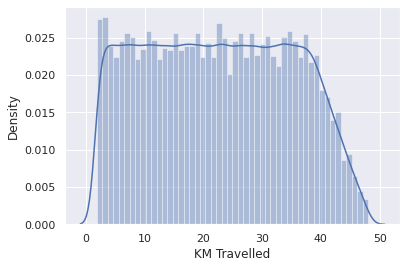

In [62]:
sns.distplot(data['KM Travelled'])

The datset has a small tail proving it is platykurtic(negative kurtosis)

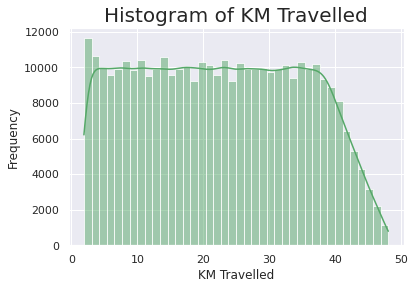

In [63]:
vizHist(numericalCols,"KM Travelled",'g')

Boxplot of KM Travelled


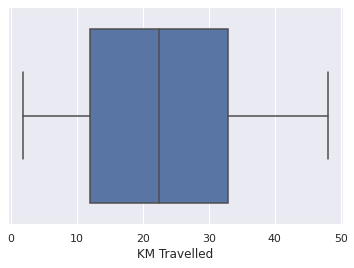

In [64]:
boxPlot(numericalCols,'KM Travelled')

We don't have lots of any extreme values that would account as outliers in this 

### Price Charged

In [65]:
numericalAnalysis(data,"Price Charged")

These are the quantile statistics of the column:Price Charged
Q1 is: 206.4375 
Q2 is: 386.36
Q3 is: 583.66

The skewness of the column is 0.8737578448085501
The kurtosis of the column is 0.7476083770138611

count    359392.000000
mean        423.443311
std         274.378911
min          15.600000
25%         206.437500
50%         386.360000
75%         583.660000
max        2048.030000
Name: Price Charged, dtype: float64




* Fewer than 25% of the trips charged less than $206 

* 50% of trips were charged above $386.36

* only 25% of trips cost more than $583.66

The distribution in this column is positively skewed with skewness at 0.87

The kurtosis of the column is at .747 this is a positive kurtosis and is hence leptokurtic. This will indicate huge tails and hence outliers in the data ( extreme values on either side)



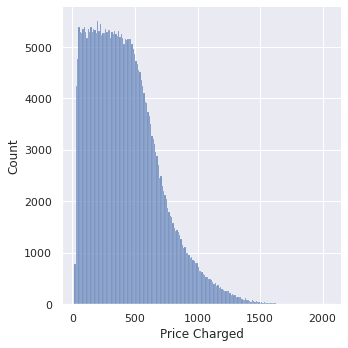

In [66]:
sns.displot(data['Price Charged'])

Boxplot of Price Charged


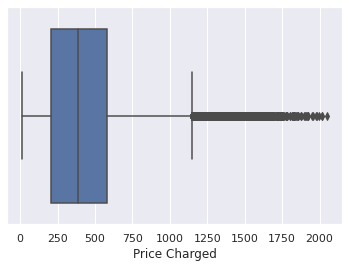

In [67]:
boxPlot(data,'Price Charged')

We do have a number of outliers, some trips were highly charged due to some reason.

### Cost of trip

In [68]:
numericalAnalysis(data,"Cost of Trip")

These are the quantile statistics of the column:Cost of Trip
Q1 is: 151.2 
Q2 is: 282.48
Q3 is: 413.6832

The skewness of the column is 0.13795748511098013
The kurtosis of the column is -1.0122353643193267

count    359392.000000
mean        286.190113
std         157.993661
min          19.000000
25%         151.200000
50%         282.480000
75%         413.683200
max         691.200000
Name: Cost of Trip, dtype: float64




*  25% of the trips cost less than $151

*  50% of the trips cost higher than $282.48

*  25% of trips cost more than $413.68

The distribution of the column seems to be slightly skewed to the right as it has minimal skewness of 0.137

The kurtosis of the column is platykurtic (negative ,-1.012) implying few extreme values/ small tails

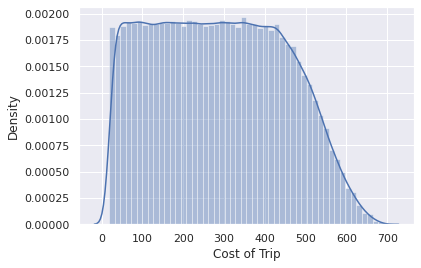

In [69]:
sns.distplot(data['Cost of Trip'])

The distplot shows a distribtuion than has a slightly longer right end (positively skewed). It also visualizes small tails implying few extreme values

Boxplot of Cost of Trip


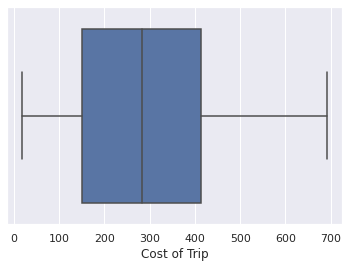

In [70]:
boxPlot(data,"Cost of Trip")

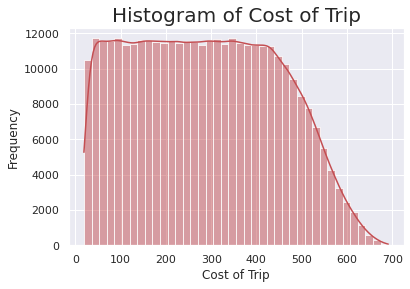

In [71]:
vizHist(data,"Cost of Trip",'r')

### Age

In [72]:
numericalAnalysis(data,"Age")

These are the quantile statistics of the column:Age
Q1 is: 25.0 
Q2 is: 33.0
Q3 is: 42.0

The skewness of the column is 0.6853359221403659
The kurtosis of the column is -0.458407095222376

count    359392.000000
mean         35.336705
std          12.594234
min          18.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          65.000000
Name: Age, dtype: float64




*  More than 75% of the people were above the age of 25, only 25% were below the age of 25

*  Half the customers were 30 of age or above

*  Only 25% of the customers were above 42 years of age. 

* The youngest to use the taxi services was 18 years while the oldest was 65 years

The column seems to be positively skewed hence a longer right tail with 0.6 skewness

The column had a kurtosis of -0.45, this is  platykurtic 

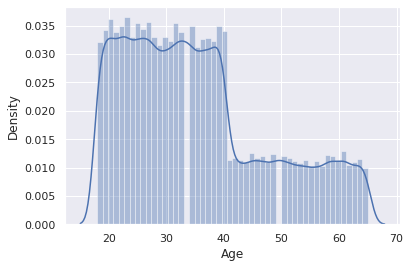

In [73]:
sns.distplot(data['Age'])

Boxplot of Age


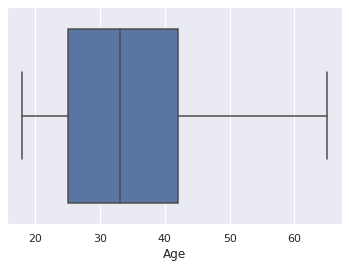

In [74]:
boxPlot(data,"Age")

### Income(USD/Month)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   City                359392 non-null  object        
 1   Population          359392 non-null  int64         
 2   Users               359392 non-null  int64         
 3   Transaction ID      359392 non-null  int64         
 4   Date of Travel      359392 non-null  datetime64[ns]
 5   Company             359392 non-null  object        
 6   KM Travelled        359392 non-null  float64       
 7   Price Charged       359392 non-null  float64       
 8   Cost of Trip        359392 non-null  float64       
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

In [76]:
numericalAnalysis(data,'Income (USD/Month)')

These are the quantile statistics of the column:Income (USD/Month)
Q1 is: 8424.0 
Q2 is: 14685.0
Q3 is: 21035.0

The skewness of the column is 0.30956094781266125
The kurtosis of the column is -0.660493222082108

count    359392.000000
mean      15048.822937
std        7969.409482
min        2000.000000
25%        8424.000000
50%       14685.000000
75%       21035.000000
max       35000.000000
Name: Income (USD/Month), dtype: float64




* Less than 25% of the customers earn less than $8424 per month

* More than half of the population either earn higher than  14685 per month or lower than $ 14685 per month

* Only 25% of people earn above $21035 per month 

The leat earner gets $2000 per month with the highest having, 35000 per month

The column is positively skewed(~ 0.31) hence a larger right tail
The column is also platykurtic(has a negative kurtosis) with ~-.66



Boxplot of Income (USD/Month)


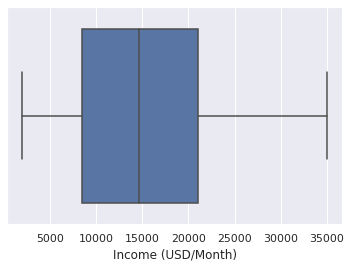

In [77]:
boxPlot(data,'Income (USD/Month)')

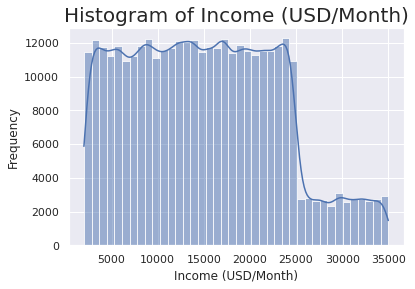

In [78]:
vizHist(data, 'Income (USD/Month)','b')

### Population

For the population Attribute we shall use the cities dataset instead of the merged datset

In [79]:
numericalAnalysis(cities,'Population')

These are the quantile statistics of the column:Population
Q1 is: 608637.25 
Q2 is: 784559.0
Q3 is: 1067041.0

The skewness of the column is 3.748639561312251
The kurtosis of the column is 13.026845373545925

count    3.593920e+05
mean     3.132198e+06
std      3.315194e+06
min      2.489680e+05
25%      6.712380e+05
50%      1.595037e+06
75%      8.405837e+06
max      8.405837e+06
Name: Population, dtype: float64




* 25% of the cities in the datset have above 608637.25 people living in the area
* Half of the cities have more than 784559.0 people
* Cities with a higher population than 1067041 account for only 25% of the study

The city with the least population has 248968 people with the highest having 8405837 people

The column is positively skewed (~3.8) this will result in a longer right tail

The column has exessive kurtosis, 13.0 it is leptokurtic, it has heavy tails and results in large number of outliers 

Boxplot of Population


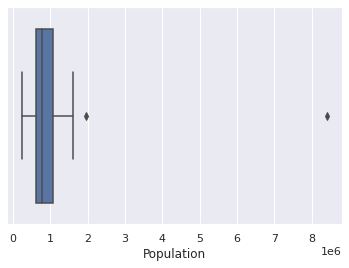

In [80]:
boxPlot(cities, 'Population')

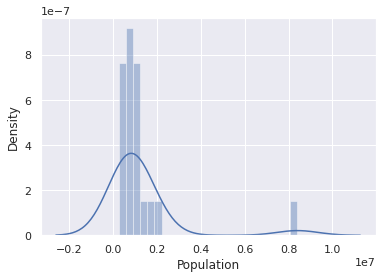

In [81]:
sns.distplot(cities['Population'])

### Users

In [82]:
numericalAnalysis(cities,'Users')

These are the quantile statistics of the column:Users
Q1 is: 11633.25 
Q2 is: 23429.0
Q3 is: 91766.0

The skewness of the column is 1.5528253542318422
The kurtosis of the column is 1.4798770017919862

count    359392.000000
mean     158365.582267
std      100850.051020
min        3643.000000
25%       80021.000000
50%      144132.000000
75%      302149.000000
max      302149.000000
Name: Users, dtype: float64




* Less than 25% of the cities have fewer than 11633.25 users of taxi services

* Most of the cities have 23429.0 users

* Fewer than 25% of cities have more than 91766 users

The city with the least amount of users has 3643 users while the city with the highest number of users has 302149.

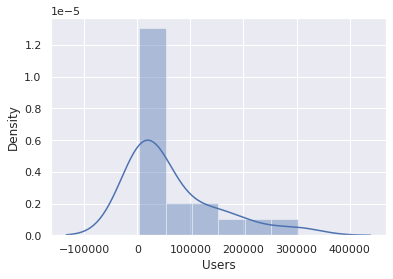

In [83]:
sns.distplot(cities['Users'])

Boxplot of Users


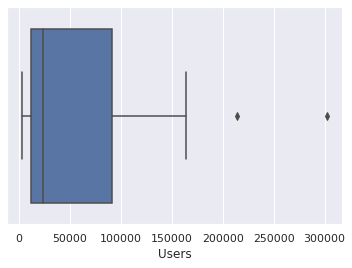

In [84]:
boxPlot(cities,'Users')

## Univariate Anlysis on Categorical Features

### City Name

In [85]:
def uniCat(datac,col):
  print("The univariate Anlysis for the column {} \n".format(col))
  print("The number of unique values is: {} \n".format(datac[col].nunique()))
  print("The unique categories are: \n")
  print(datac[col].unique())

  print("The vale counts for each unique value: \n")
  print(datac[col].value_counts(ascending=False))

  plt.title("Countplot for {} \n".format(col))
  plt.xticks(rotation=90)
  sns.countplot(datac[col])
 

The univariate Anlysis for the column City 

The number of unique values is: 19 

The unique categories are: 

['NEW YORK NY' 'CHICAGO IL' 'LOS ANGELES CA' 'MIAMI FL' 'SILICON VALLEY'
 'ORANGE COUNTY' 'SAN DIEGO CA' 'PHOENIX AZ' 'DALLAS TX' 'ATLANTA GA'
 'DENVER CO' 'AUSTIN TX' 'SEATTLE WA' 'TUCSON AZ' 'SACRAMENTO CA'
 'PITTSBURGH PA' 'WASHINGTON DC' 'NASHVILLE TN' 'BOSTON MA']
The vale counts for each unique value: 

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64


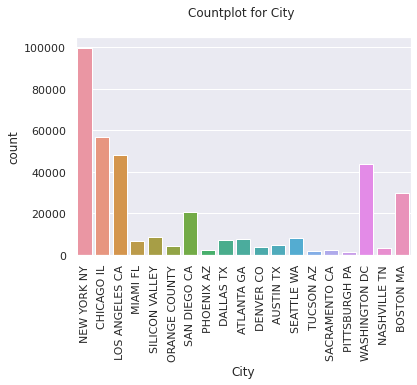

In [86]:
uniCat(data,'City')

We notice that we are one down on the cities i.e the cities dataset gives 20 cities but we onlt have 19 here. The missing one is san francisco 

### Gender

The univariate Anlysis for the column Gender 

The number of unique values is: 2 

The unique categories are: 

['Male' 'Female']
The vale counts for each unique value: 

Male      205912
Female    153480
Name: Gender, dtype: int64


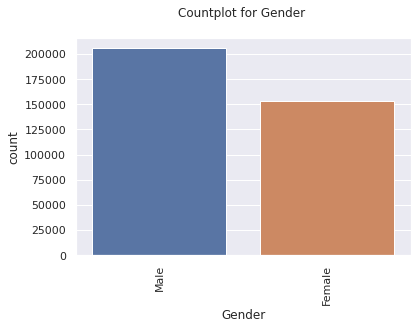

In [87]:
uniCat(data,'Gender')

### Company

The univariate Anlysis for the column Company 

The number of unique values is: 2 

The unique categories are: 

['Pink Cab' 'Yellow Cab']
The vale counts for each unique value: 

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64


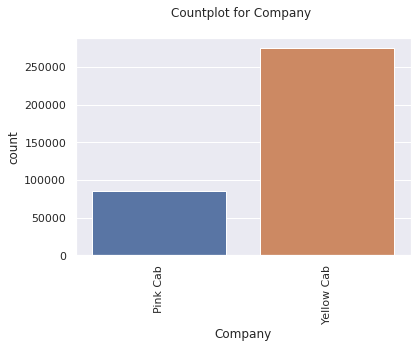

In [88]:
uniCat(data,'Company')

### Payment Mode

The univariate Anlysis for the column Payment_Mode 

The number of unique values is: 2 

The unique categories are: 

['Cash' 'Card']
The vale counts for each unique value: 

Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64


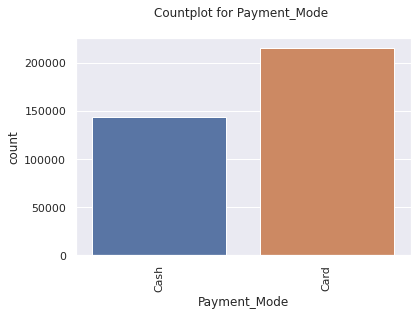

In [89]:
uniCat(data,'Payment_Mode')

In [90]:
cities.City.nunique()

20

# Bivariate Analysis

We carry out some bivariate anylsis to discover some relationships in data

## Data Anylsis

### Users vs Population 

Does the number of users increase if the population increases

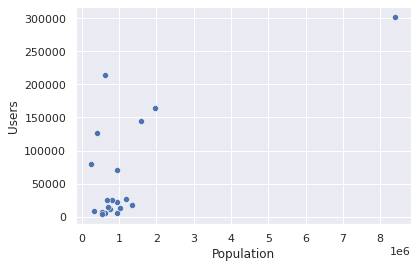

In [91]:
sns.scatterplot(y=cities['Users'],x=cities['Population'])

We see that there isn't a strong relationship linear between users and population as some cities with lower population have a higher number of users

### KM vs Profit

The more kilometers travelled the higher the profit 

In [93]:
data.Profit.max()

1463.9660000000003

In [94]:
data.Profit.min()

-220.06

The highest marging of profit is 1463.9 while the largest lost was -220.06

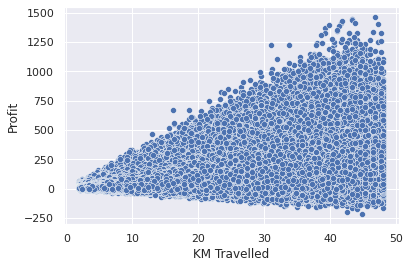

In [91]:
sns.scatterplot(x=data['KM Travelled'],y=data["Profit"])

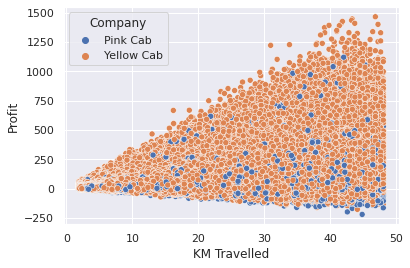

In [92]:
sns.scatterplot(x=data['KM Travelled'],y=data["Profit"],hue=data['Company'])

There exist some kind of linear relationship between km travelled and profit, the more km travelled the higher the profit/loss of a company

### Income(USD) vs  Gender

Does a certain gender make more as compared to the other

In [93]:
data.groupby(['Gender'])['Income (USD/Month)'].mean()

Gender
Female    15057.968954
Male      15042.005799
Name: Income (USD/Month), dtype: float64

On average both genders earn pretty much the same income


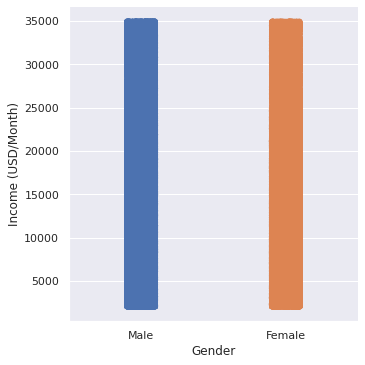

In [94]:
sns.catplot(x="Gender", y="Income (USD/Month)", data=data)

### Age vs Income

Does age determine how much a person earns?

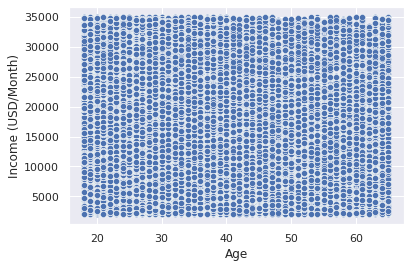

In [95]:
sns.scatterplot(x=data["Age"],y=data["Income (USD/Month)"])

### Income vs KM Travelled

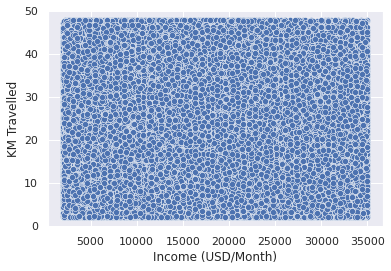

In [96]:
sns.scatterplot(x=data["Income (USD/Month)"],y=data['KM Travelled'])

There is no relationship between Income and KM travelled 

### Quarter vs Profit

In [97]:
data.groupby(['Quarter'])["Profit"].mean()

Quarter
1    151.700074
2    151.489706
3    126.398459
4    127.817317
Name: Profit, dtype: float64

The first half of the year (first two quarters) seems to average a higher profit as compared to the last two

In [98]:
data.groupby(['Quarter'])['Profit'].sum()

Quarter
1    1.038812e+07
2    1.212857e+07
3    1.242927e+07
4    1.438175e+07
Name: Profit, dtype: float64

### Quarters vs KM Travelled

Do people travell more on  certain times of the year

In [99]:
data.groupby(['Quarter'])['KM Travelled'].median()

Quarter
1    22.47
2    22.40
3    22.44
4    22.54
Name: KM Travelled, dtype: float64

In [100]:
data.groupby(['Quarter'])['KM Travelled'].mean()

Quarter
1    22.595628
2    22.506439
3    22.584680
4    22.578030
Name: KM Travelled, dtype: float64

In [184]:
data.groupby(['Quarter'])['KM Travelled'].sum()

Quarter
1    1547303.43
2    1801910.51
3    2220841.89
4    2540434.75
Name: KM Travelled, dtype: float64

Text(0.5, 1.0, 'Number of KM Travelled per Quarter')

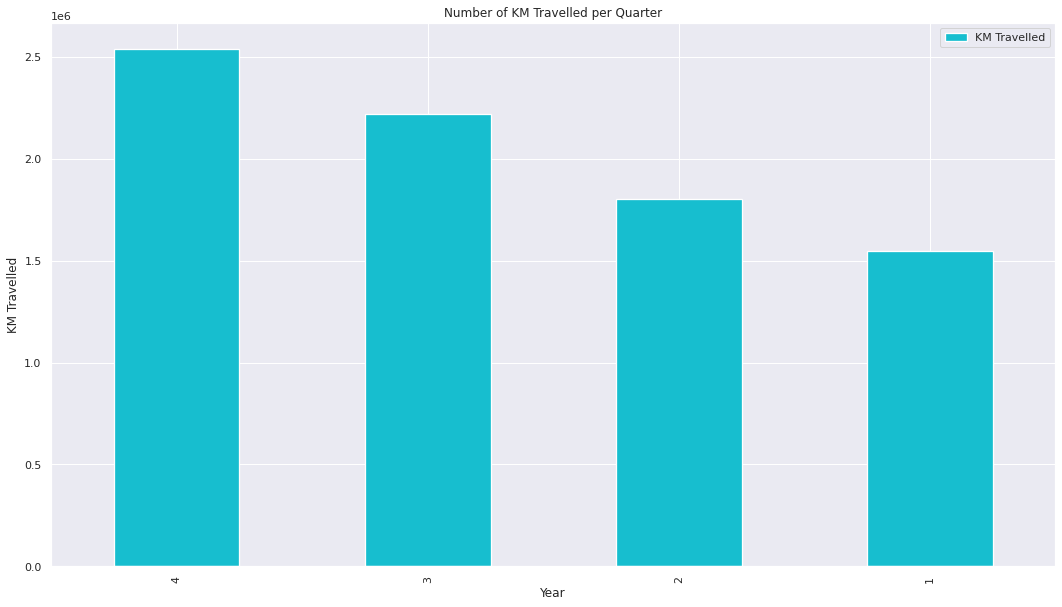

In [99]:
quarterDistance=data.groupby('Quarter')['KM Travelled'].sum()
quarterDistance=pd.DataFrame(quarterDistance)
quarterDistance=quarterDistance.sort_values(by='KM Travelled',ascending=False)
# plt.figure(figsize=(10,10))

quarterDistance.plot.bar(color='tab:cyan',linewidth=1.3,figsize=(18,10))
plt.xticks(rotation=90)
plt.ylabel('KM Travelled')
plt.xlabel("Year")
plt.title("Number of KM Travelled per Quarter")

There is evidently more travel as the year proceeds as we see more travel happend in the 4th and 3rd quarters

Hence best time to invest will be in those quarters

### Days of the week vs KM Travelled

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   City                359392 non-null  object        
 1   Population          359392 non-null  int64         
 2   Users               359392 non-null  int64         
 3   Transaction ID      359392 non-null  int64         
 4   Date of Travel      359392 non-null  datetime64[ns]
 5   Company             359392 non-null  object        
 6   KM Travelled        359392 non-null  float64       
 7   Price Charged       359392 non-null  float64       
 8   Cost of Trip        359392 non-null  float64       
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

In [102]:
data.groupby(['Day_week'])['KM Travelled'].mean()

Day_week
0    22.613886
1    22.492520
2    22.525932
3    22.601038
4    22.603830
5    22.600371
6    22.467666
Name: KM Travelled, dtype: float64

In [103]:
data.groupby(['Day_week'])['KM Travelled'].median()

Day_week
0    22.44
1    22.42
2    22.44
3    22.54
4    22.47
5    22.54
6    22.23
Name: KM Travelled, dtype: float64

On average people travell the same distance everyday

In [104]:
data.groupby(['Day_week'])['KM Travelled'].sum()

Day_week
0     898042.64
1     814431.66
2     985329.32
3    1591113.06
4    1499764.13
5    1381515.46
6     940294.31
Name: KM Travelled, dtype: float64

People have travelled further on Thursdays 

Text(0.5, 1.0, 'Number of KM Travelled per Day')

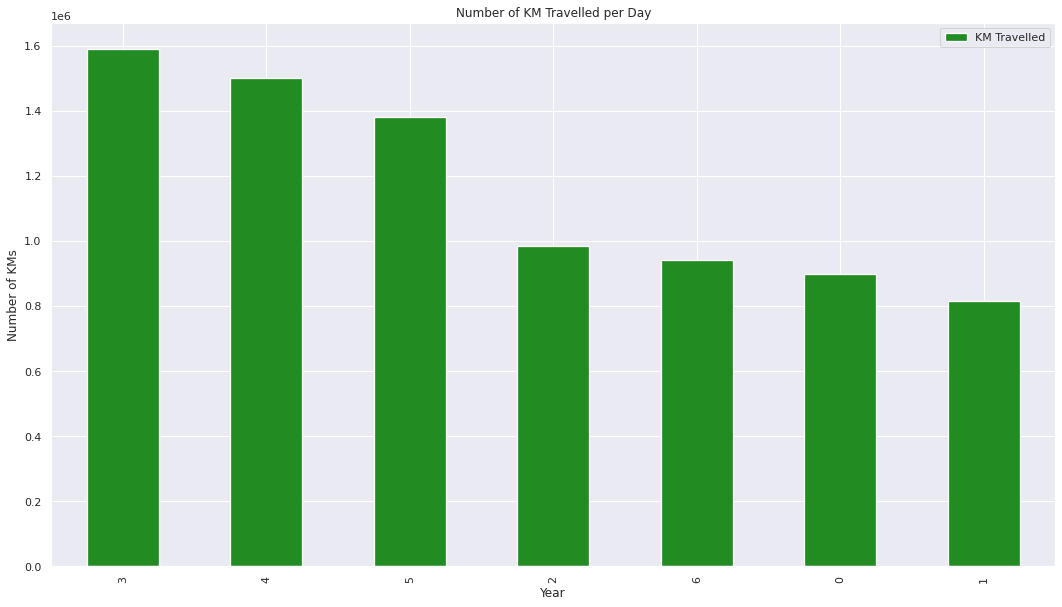

In [102]:
dayDistance=data.groupby('Day_week')['KM Travelled'].sum()
dayDistance=pd.DataFrame(dayDistance)
dayDistance=dayDistance.sort_values(by='KM Travelled',ascending=False)
# plt.figure(figsize=(10,10))

dayDistance.plot.bar(color='forestgreen',linewidth=1.3,figsize=(18,10))
plt.xticks(rotation=90)
plt.ylabel('Number of KMs')
plt.xlabel("Year")
plt.title("Number of KM Travelled per Day")

### Day_Week vs Profit

Are there any more proftable days than others

In [105]:
data.groupby(['Day_week'])['Profit'].mean()

Day_week
0    131.574436
1    125.607329
2    125.904117
3    140.974289
4    142.899955
5    150.997458
6    129.292712
Name: Profit, dtype: float64

Saturdays seems to be more profitable on average than most days
Tuesdays and Wednesdays are least profitable on average

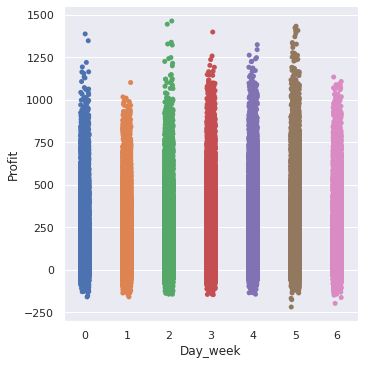

In [106]:
sns.catplot(x="Day_week", y="Profit", data=data)

In [107]:
data.groupby(['Day_week'])['Profit'].sum()

Day_week
0    5.225084e+06
1    4.548116e+06
2    5.507298e+06
3    9.924590e+06
4    9.481412e+06
5    9.230173e+06
6    5.411029e+06
Name: Profit, dtype: float64

Thursdays have a larger profit sum when compared to toher days of the week with a total of 9,924,590 USD

Tuesdays have the least profit generated with a total of 4,548,116 USD

### Company vs Profit

Does a certain company make more profit than the other?

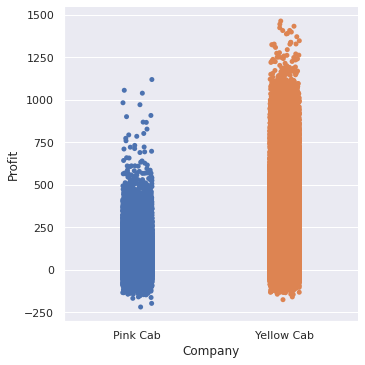

In [108]:
sns.catplot(x="Company", y="Profit", data=data)

In [109]:
data.groupby(['Company'])['Profit'].mean()

Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: Profit, dtype: float64

The Yellow Company makes more profit on average than the pink cab company

In [110]:
data.groupby(['Company'])['Profit'].sum()

Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: Profit, dtype: float64

The yellow cab company has made 44,402,037 USD in profits as compared to 5,307,328 USD made by the Pink Cab Company

### Month vs Profit

Does a certain month fetch more profit than others

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   City                359392 non-null  object        
 1   Population          359392 non-null  int64         
 2   Users               359392 non-null  int64         
 3   Transaction ID      359392 non-null  int64         
 4   Date of Travel      359392 non-null  datetime64[ns]
 5   Company             359392 non-null  object        
 6   KM Travelled        359392 non-null  float64       
 7   Price Charged       359392 non-null  float64       
 8   Cost of Trip        359392 non-null  float64       
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

In [112]:
data.groupby(['Month'])['Profit'].sum()

Month
1     3.163165e+06
2     3.732548e+06
3     3.492405e+06
4     3.910198e+06
5     4.337438e+06
6     3.880933e+06
7     3.761782e+06
8     3.609168e+06
9     5.058316e+06
10    4.319899e+06
11    4.550712e+06
12    5.511138e+06
Name: Profit, dtype: float64

Months of December and September generate more pofit(Probably due to the holidays) than other months, January has the lowest profit gain of any month

In [113]:
data.groupby(['Month','Company'])['Profit'].sum()

Month  Company   
1      Pink Cab      2.642934e+05
       Yellow Cab    2.898871e+06
2      Pink Cab      3.714012e+05
       Yellow Cab    3.361147e+06
3      Pink Cab      3.325238e+05
       Yellow Cab    3.159881e+06
4      Pink Cab      3.310499e+05
       Yellow Cab    3.579148e+06
5      Pink Cab      2.967411e+05
       Yellow Cab    4.040697e+06
6      Pink Cab      3.123768e+05
       Yellow Cab    3.568557e+06
7      Pink Cab      3.817839e+05
       Yellow Cab    3.379998e+06
8      Pink Cab      4.402392e+05
       Yellow Cab    3.168928e+06
9      Pink Cab      5.896759e+05
       Yellow Cab    4.468640e+06
10     Pink Cab      5.557497e+05
       Yellow Cab    3.764149e+06
11     Pink Cab      5.999409e+05
       Yellow Cab    3.950771e+06
12     Pink Cab      8.315525e+05
       Yellow Cab    4.679586e+06
Name: Profit, dtype: float64

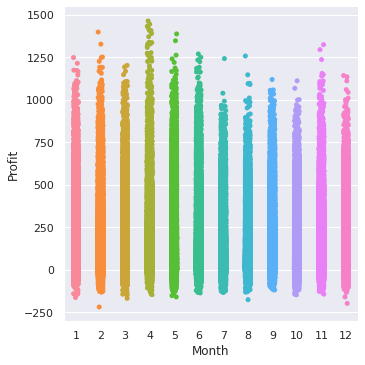

In [114]:
sns.catplot(x="Month", y="Profit", data=data)

### Revenue vs Month

Does a certain month generate more revenue than others?

In [115]:
data.groupby(['Month'])['Price Charged'].sum()

Month
1      9192275.76
2     10530772.43
3     10350279.50
4     11383685.76
5     12136350.90
6     11505942.63
7     12463957.00
8     12579470.74
9     15502452.28
10    14356257.12
11    15073558.70
12    17107135.70
Name: Price Charged, dtype: float64

Text(0.5, 1.0, 'Revenue Per Month')

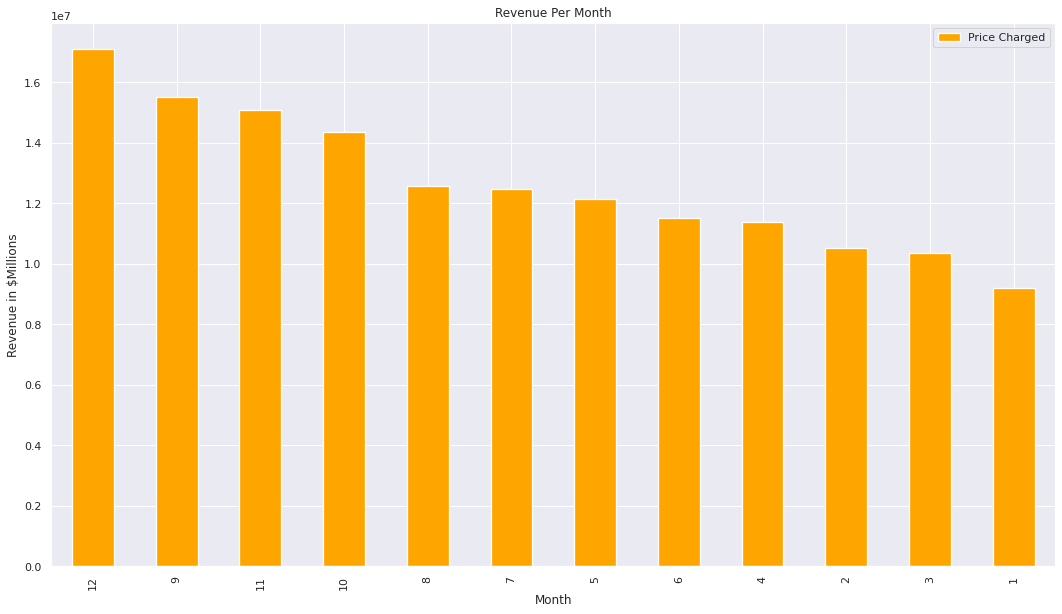

In [105]:
monthRev=data.groupby('Month')['Price Charged'].sum()
monthRev=pd.DataFrame(monthRev)
monthRev=monthRev.sort_values(by='Price Charged',ascending=False)
# plt.figure(figsize=(10,10))

monthRev.plot.bar(color='orange',linewidth=1.3,figsize=(18,10))
plt.xticks(rotation=90)
plt.ylabel('Revenue in $Millions')
plt.xlabel("Month")
plt.title("Revenue Per Month")

The last month December brings in the most revenue we can also note that months in the last two quarters of the year do better than those in the first and second

#### Revenue per Month Per Company

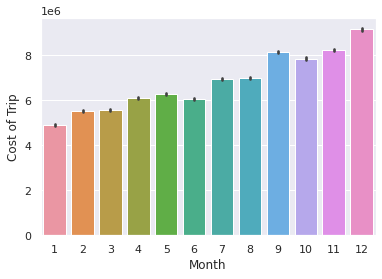

In [113]:
yellowCab=data[data['Company']=="Yellow Cab"]
sns.barplot(x=yellowCab['Month'],y=yellowCab['Cost of Trip'],estimator=sum)
plt.title("Revenue Per Month for YellowCab")

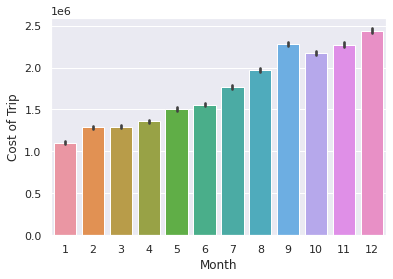

In [114]:
pinkCab=data[data['Company']=="Pink Cab"]
sns.barplot(x=pinkCab['Month'],y=pinkCab['Cost of Trip'],estimator=sum)
plt.title("Revenue Per Month for Pink Cab")

### City vs Profit

Are Certain Cities more profitable than others?

In [116]:
data.groupby(['City'])['Profit'].sum().sort_values(ascending=False)

City
NEW YORK NY       2.796256e+07
LOS ANGELES CA    4.411709e+06
WASHINGTON DC     3.492870e+06
CHICAGO IL        3.387313e+06
BOSTON MA         1.768719e+06
SAN DIEGO CA      1.587163e+06
SILICON VALLEY    1.316705e+06
DALLAS TX         1.128733e+06
ATLANTA GA        8.424329e+05
MIAMI FL          7.583012e+05
SEATTLE WA        6.046849e+05
AUSTIN TX         5.267010e+05
ORANGE COUNTY     4.570019e+05
DENVER CO         3.975850e+05
PHOENIX AZ        1.929409e+05
NASHVILLE TN      1.495322e+05
TUCSON AZ         1.402607e+05
SACRAMENTO CA     1.173262e+05
PITTSBURGH PA     8.516596e+04
Name: Profit, dtype: float64

Text(0.5, 1.0, 'Proifits per each City')

<Figure size 1440x720 with 0 Axes>

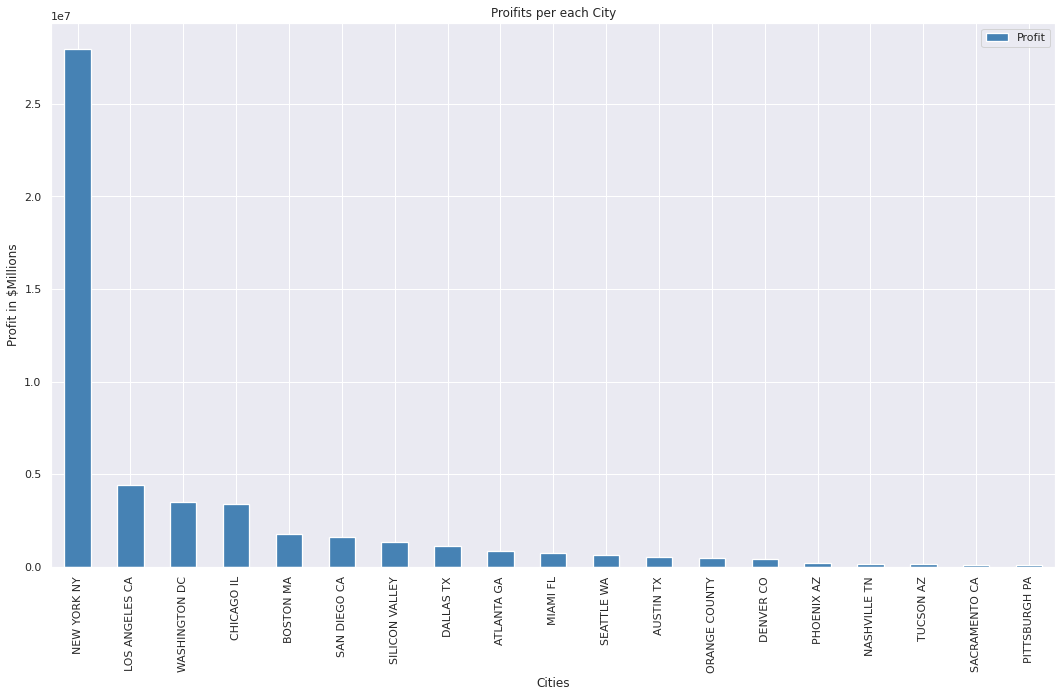

In [206]:
cityProfit=data.groupby('City').Profit.sum()
cityProfit=pd.DataFrame(cityProfit)
cityProfit=cityProfit.sort_values(by='Profit',ascending=False)
plt.figure(figsize=(20,10))

cityProfit.plot.bar(color='steelblue',linewidth=1.3,figsize=(18,10))
plt.xticks(rotation=90)
plt.ylabel('Profit in $Millions')
plt.xlabel("Cities")
plt.title("Proifits per each City")





(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

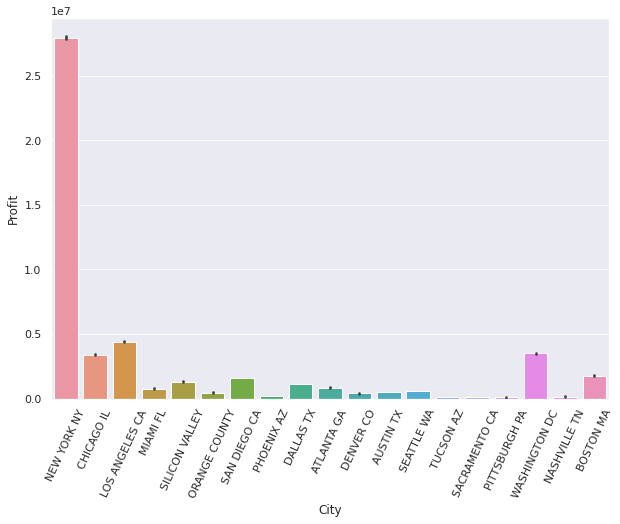

In [207]:
plt.figure(figsize=(10,7))
sns.barplot(x=data["City"],y=data['Profit'],estimator=sum)
plt.xticks(rotation=65)

#### Profit per City per Each Company

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

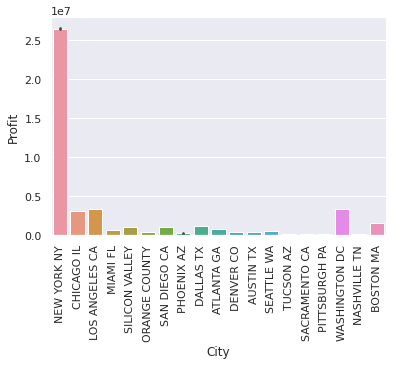

In [118]:
sns.barplot(x=yellowCab['City'],y=yellowCab['Profit'],estimator=sum)
plt.xticks(rotation=90)
plt.title("Profits Per Month for Yellow Company")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

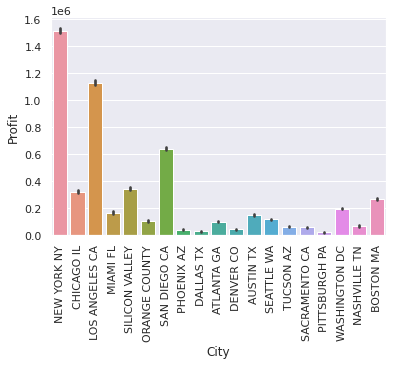

In [119]:
sns.barplot(x=pinkCab['City'],y=pinkCab['Profit'],estimator=sum)
plt.xticks(rotation=90)
plt.title("Profit for Pink Company")

### Profits vs Year

In [117]:
data.groupby(['Year'])['Profit'].sum()

Year
2016    1.581377e+07
2017    1.847937e+07
2018    1.503456e+07
Name: Profit, dtype: float64

In [118]:

data2016=data.loc[data['Year']==2016]
data2017=data.loc[data['Year']==2017]
data2018=data.loc[data['Year']==2018]
profit2016=round(data2016['Profit'].sum())
profit2017=round(data2017['Profit'].sum())
profit2018=round(data2018['Profit'].sum())
# sns.lineplot(x=data['Year'],y=data['Profit'])

In [119]:
profitDF=pd.DataFrame(data=[profit2018,profit2017,profit2016],columns=["Profit"],index=[2018,2017,2016])




In [120]:
profitDF


,Profit
2018,15034565
2017,18479368
2016,15813769


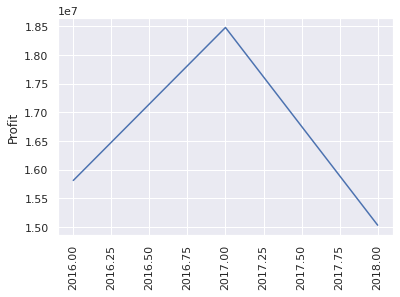

In [121]:
plt.xticks(rotation=90)
sns.lineplot(y=profitDF['Profit'],x=profitDF.index)

Text(0.5, 1.0, 'Proifits per Year')

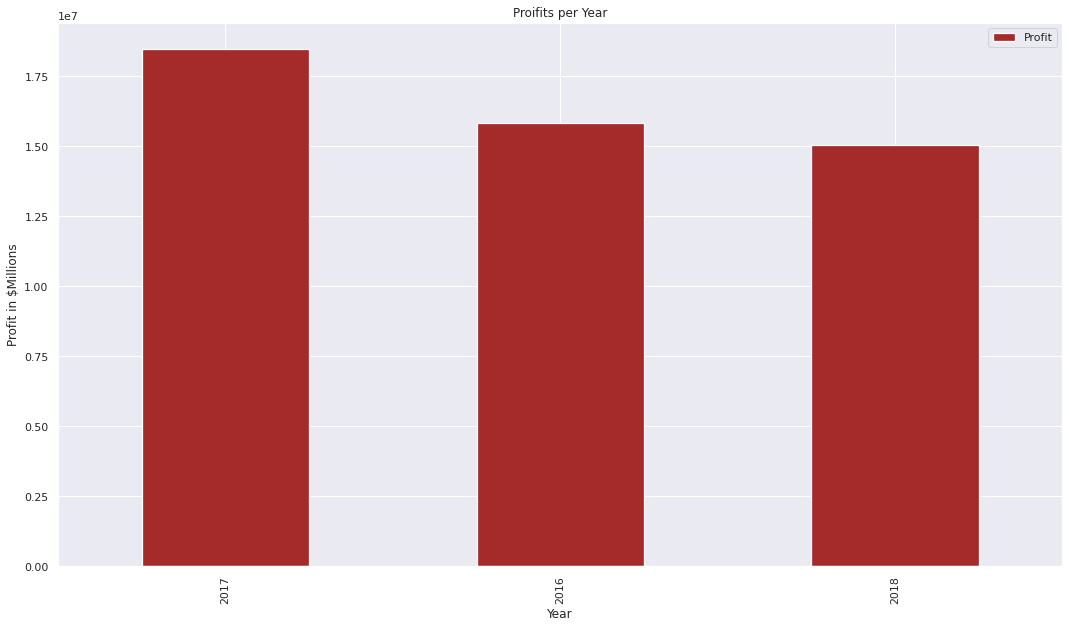

In [215]:
yearlyProfit=data.groupby('Year').Profit.sum()
yearlyProfit=pd.DataFrame(yearlyProfit)
yearlyProfit=yearlyProfit.sort_values(by='Profit',ascending=False)
# plt.figure(figsize=(10,10))

yearlyProfit.plot.bar(color='brown',linewidth=1.3,figsize=(18,10))
plt.xticks(rotation=90)
plt.ylabel('Profit in $Millions')
plt.xlabel("Year")
plt.title("Proifits per Year")

In general the profits were highest at 2017 and dipped in 2018

**The reason for this dip could be associated to the rise of uber in major american cities as from 2017**

In [122]:
#Profit generated per company per year
data.groupby(['Year','Company'])['Profit'].sum()

Year  Company   
2016  Pink Cab      1.739883e+06
      Yellow Cab    1.407389e+07
2017  Pink Cab      2.015101e+06
      Yellow Cab    1.646427e+07
2018  Pink Cab      1.552345e+06
      Yellow Cab    1.348222e+07
Name: Profit, dtype: float64

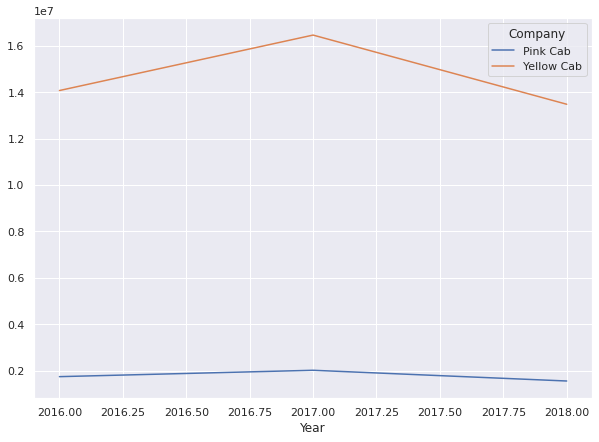

In [123]:
fig, ax = plt.subplots(figsize=(10,7))
data.groupby(['Year','Company'])['Profit'].sum().unstack().plot(ax=ax)

### Profit per Company per Quarter

In [124]:
data.groupby(['Quarter','Company'])['Profit'].sum()

Quarter  Company   
1        Pink Cab      9.682184e+05
         Yellow Cab    9.419899e+06
2        Pink Cab      9.401677e+05
         Yellow Cab    1.118840e+07
3        Pink Cab      1.411699e+06
         Yellow Cab    1.101757e+07
4        Pink Cab      1.987243e+06
         Yellow Cab    1.239451e+07
Name: Profit, dtype: float64

In [125]:
data.groupby(['Quarter','Company'])['Profit'].median()

Quarter  Company   
1        Pink Cab       46.5200
         Yellow Cab    112.7960
2        Pink Cab       33.6930
         Yellow Cab    116.3528
3        Pink Cab       37.3660
         Yellow Cab     93.8120
4        Pink Cab       47.7400
         Yellow Cab     93.1952
Name: Profit, dtype: float64

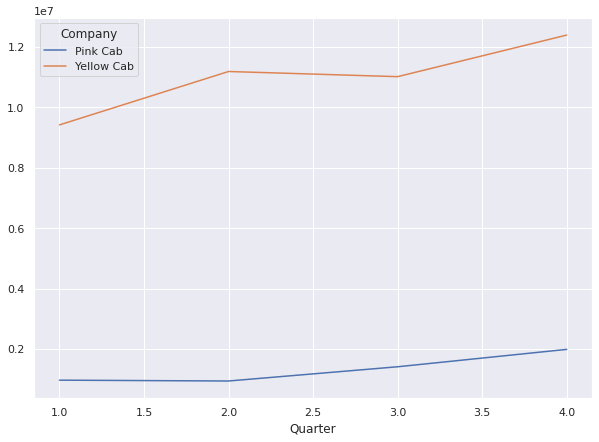

In [217]:
fig, ax = plt.subplots(figsize=(10,7))
data.groupby(['Quarter','Company'])['Profit'].sum().unstack().plot(ax=ax)

Theres a steady increase in profit over the quarters with the yellow cab having substansial amount of profits

### Profit per Company per Month

In [218]:
data.groupby(['Month','Company'])['Profit'].sum()

Month  Company   
1      Pink Cab      2.642934e+05
       Yellow Cab    2.898871e+06
2      Pink Cab      3.714012e+05
       Yellow Cab    3.361147e+06
3      Pink Cab      3.325238e+05
       Yellow Cab    3.159881e+06
4      Pink Cab      3.310499e+05
       Yellow Cab    3.579148e+06
5      Pink Cab      2.967411e+05
       Yellow Cab    4.040697e+06
6      Pink Cab      3.123768e+05
       Yellow Cab    3.568557e+06
7      Pink Cab      3.817839e+05
       Yellow Cab    3.379998e+06
8      Pink Cab      4.402392e+05
       Yellow Cab    3.168928e+06
9      Pink Cab      5.896759e+05
       Yellow Cab    4.468640e+06
10     Pink Cab      5.557497e+05
       Yellow Cab    3.764149e+06
11     Pink Cab      5.999409e+05
       Yellow Cab    3.950771e+06
12     Pink Cab      8.315525e+05
       Yellow Cab    4.679586e+06
Name: Profit, dtype: float64

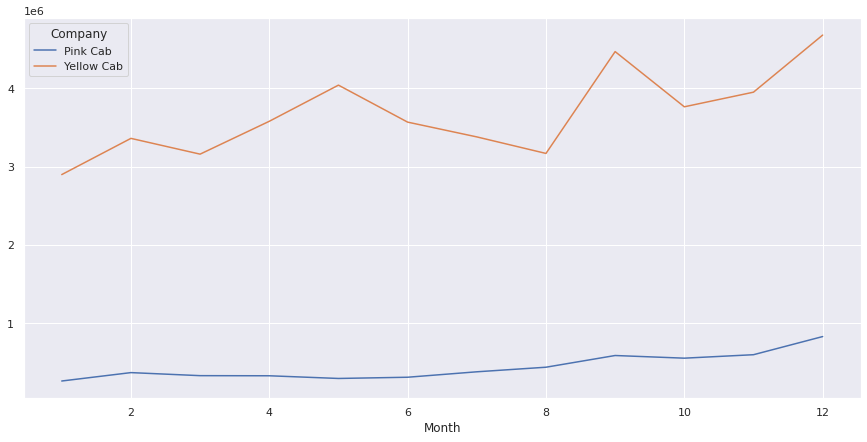

In [219]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['Month','Company'])['Profit'].sum().unstack().plot(ax=ax)

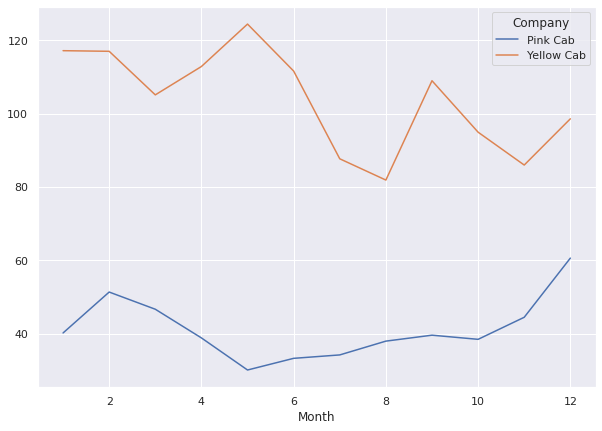

In [129]:
fig, ax = plt.subplots(figsize=(10,7))
data.groupby(['Month','Company'])['Profit'].median().unstack().plot(ax=ax)

### City per km profit

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   City                359392 non-null  object        
 1   Population          359392 non-null  int64         
 2   Users               359392 non-null  int64         
 3   Transaction ID      359392 non-null  int64         
 4   Date of Travel      359392 non-null  datetime64[ns]
 5   Company             359392 non-null  object        
 6   KM Travelled        359392 non-null  float64       
 7   Price Charged       359392 non-null  float64       
 8   Cost of Trip        359392 non-null  float64       
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

Text(0.5, 1.0, 'Proifits/KM each City')

<Figure size 1440x720 with 0 Axes>

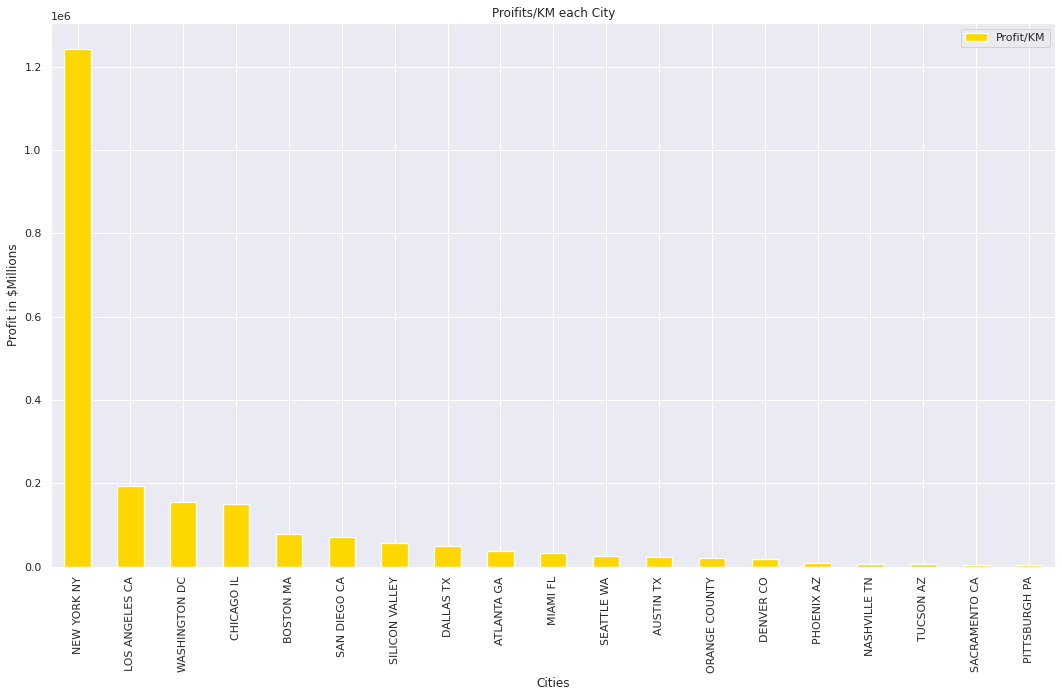

In [223]:
cityProfit=data.groupby('City')['Profit/KM'].sum()
cityProfit=pd.DataFrame(cityProfit)
cityProfit=cityProfit.sort_values(by='Profit/KM',ascending=False)
plt.figure(figsize=(20,10))

cityProfit.plot.bar(color='gold',linewidth=1.3,figsize=(18,10))
plt.xticks(rotation=90)
plt.ylabel('Profit in $Millions')
plt.xlabel("Cities")
plt.title("Proifits/KM each City")

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 <a list of 10 Text major ticklabel objects>)

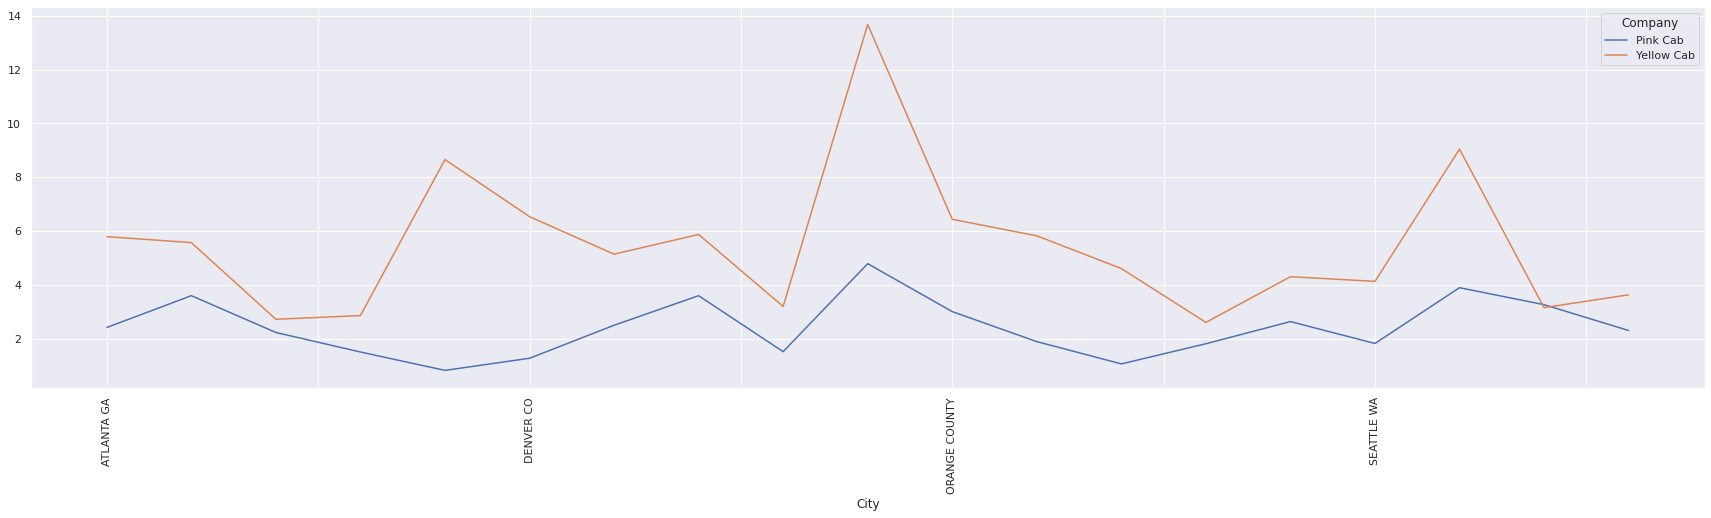

In [131]:
fig, ax = plt.subplots(figsize=(30,7))

data.groupby(['City','Company'])['Profit/KM'].mean().unstack().plot(ax=ax)
plt.xticks(rotation=90)

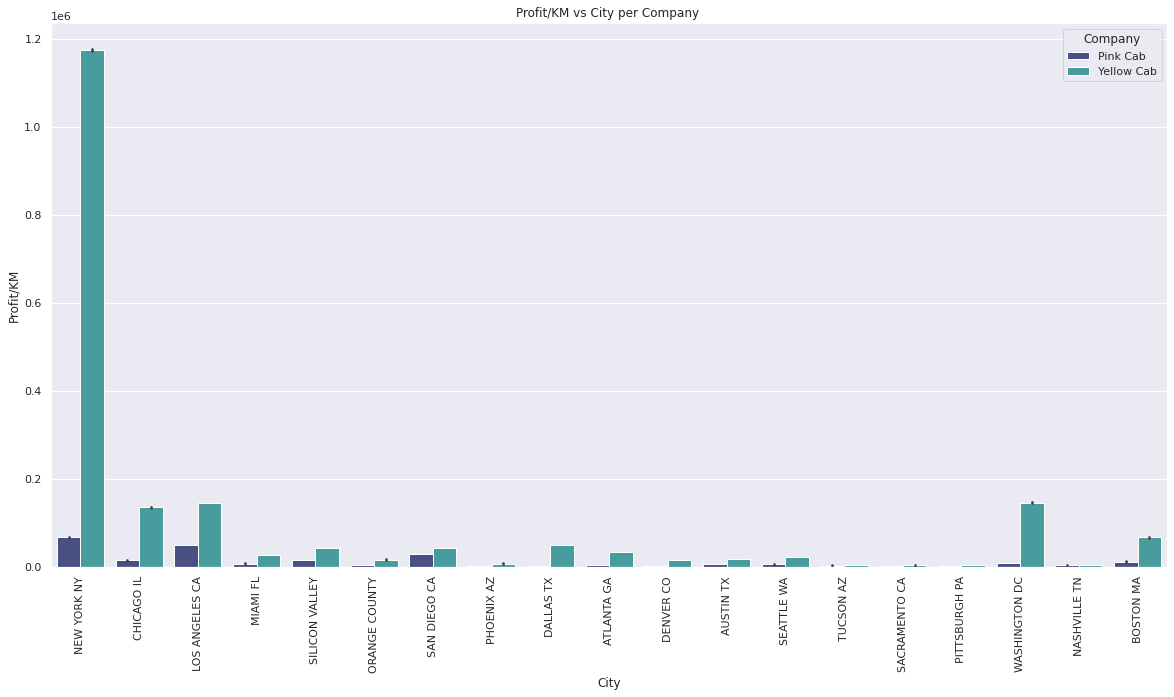

In [117]:
sns.set_color_codes()

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
profitOrder=data.groupby(['City'])['Profit/KM'].agg('mean').sort_values()
plt.title("Profit/KM vs City per Company ")
sns.barplot(x=data['City'],y=data['Profit/KM'],hue=data['Company'],estimator=sum,palette='mako')

We can see that the yellow taxi company is profitable in all of the states

With New York being the most profitable city. The best investemtn should be in the company that has the largest market share

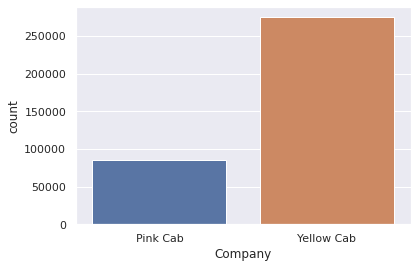

In [146]:
sns.countplot(data['Company'])

In [136]:
data.groupby(['City'])['Profit'].sum().sort_values(ascending=False)

City
NEW YORK NY       2.796256e+07
LOS ANGELES CA    4.411709e+06
WASHINGTON DC     3.492870e+06
CHICAGO IL        3.387313e+06
BOSTON MA         1.768719e+06
SAN DIEGO CA      1.587163e+06
SILICON VALLEY    1.316705e+06
DALLAS TX         1.128733e+06
ATLANTA GA        8.424329e+05
MIAMI FL          7.583012e+05
SEATTLE WA        6.046849e+05
AUSTIN TX         5.267010e+05
ORANGE COUNTY     4.570019e+05
DENVER CO         3.975850e+05
PHOENIX AZ        1.929409e+05
NASHVILLE TN      1.495322e+05
TUCSON AZ         1.402607e+05
SACRAMENTO CA     1.173262e+05
PITTSBURGH PA     8.516596e+04
Name: Profit, dtype: float64

### States with user/population ratio

In [147]:
cities['User/Pop']=(cities['Users']/cities['Population'])*100

In [148]:
cities

,City,Population,Users,User/Pop
0,NEW YORK NY,8405837,302149,3.594514
1,CHICAGO IL,1955130,164468,8.412126
2,LOS ANGELES CA,1595037,144132,9.036279
3,MIAMI FL,1339155,17675,1.319862
4,SILICON VALLEY,1177609,27247,2.313756
5,ORANGE COUNTY,1030185,12994,1.261327
6,SAN DIEGO CA,959307,69995,7.296413
7,PHOENIX AZ,943999,6133,0.649683
8,DALLAS TX,942908,22157,2.349858
9,ATLANTA GA,814885,24701,3.031225


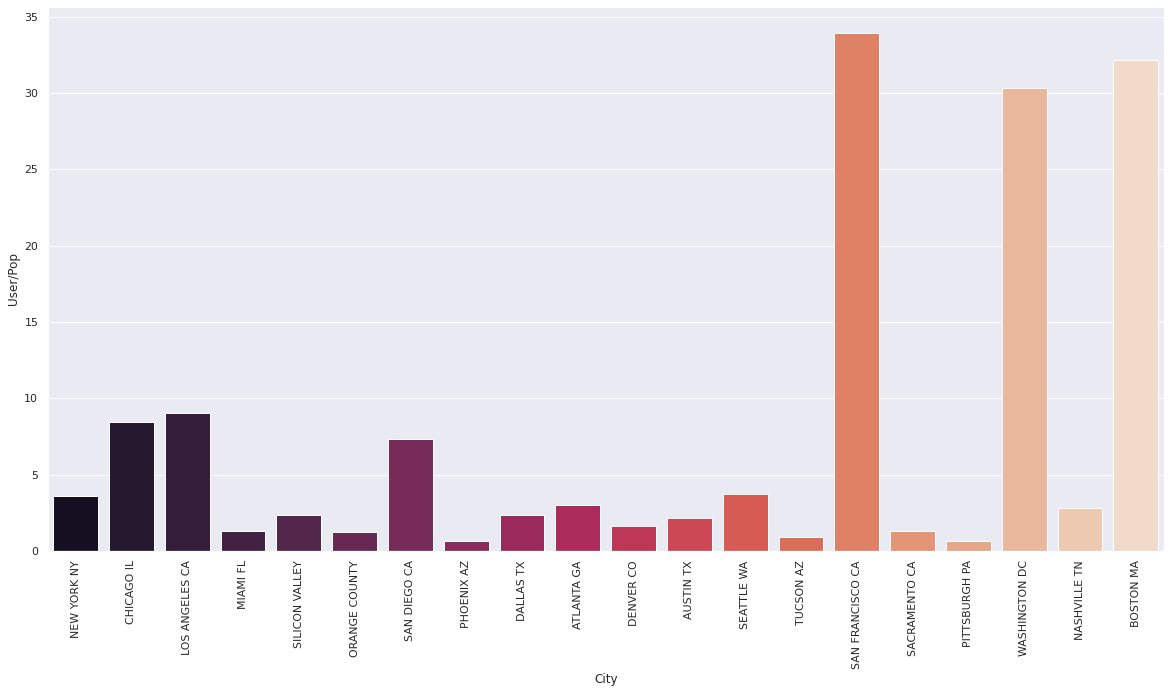

In [235]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
# profitOrder=data.groupby(['City'])['Profit/KM'].agg('mean').sort_values()
sns.barplot(x=cities['City'],y=cities['User/Pop'],palette='rocket')

From the above we get the city with the highest users to poulation ratio. This can be used as a key insight to invest in the company that domainates this cities as the market is high

Who dominates these cities?

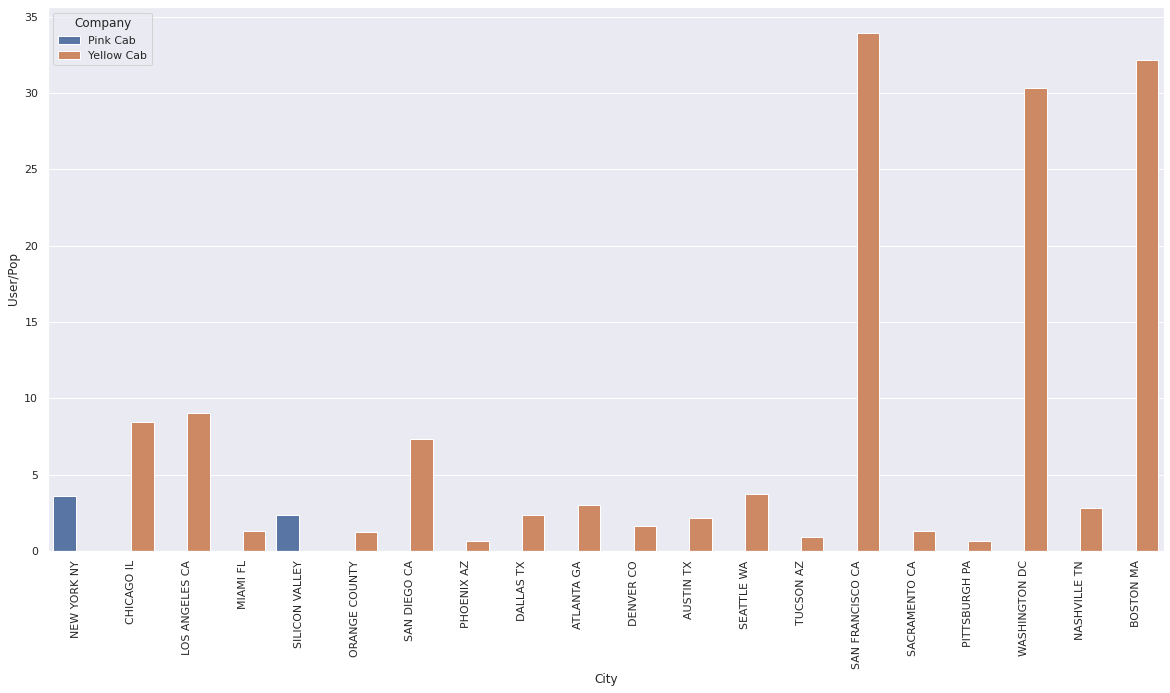

In [156]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
# profitOrder=data.groupby(['City'])['Profit/KM'].agg('mean').sort_values()
sns.barplot(x=cities['City'],y=cities['User/Pop'],hue=data['Company'])

**We can see that the Yellow Cab company takes a larger piece of the pie when it comes to this**

### Profit between cards and cash

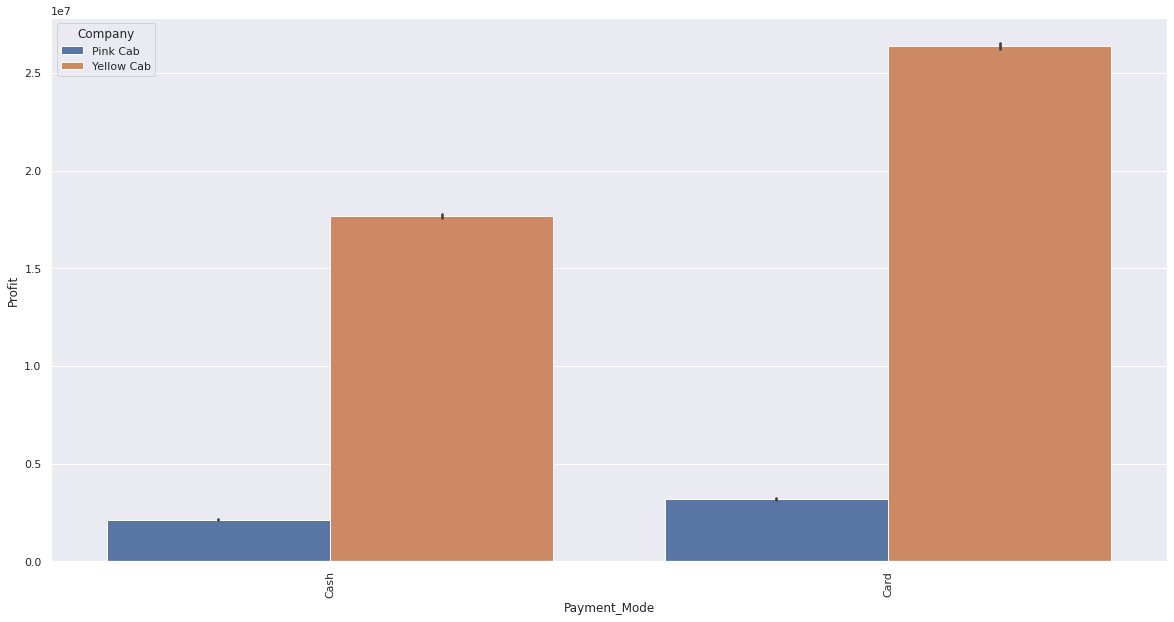

In [120]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(x=data['Payment_Mode'],y=data['Profit'],hue=data['Company'],estimator=sum)

In [170]:
data.groupby(['Company','Payment_Mode'])['Profit'].sum()

Company     Payment_Mode
Pink Cab    Card            3.180603e+06
            Cash            2.126726e+06
Yellow Cab  Card            2.636208e+07
            Cash            1.765830e+07
Name: Profit, dtype: float64

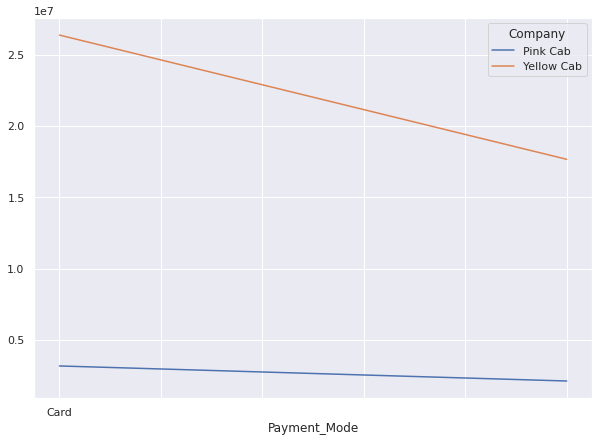

In [176]:
fig, ax = plt.subplots(figsize=(10,7))

data.groupby(['Payment_Mode','Company'])['Profit'].sum().unstack().plot(ax=ax)

The Yellow company remains dominant in both card and cash payments

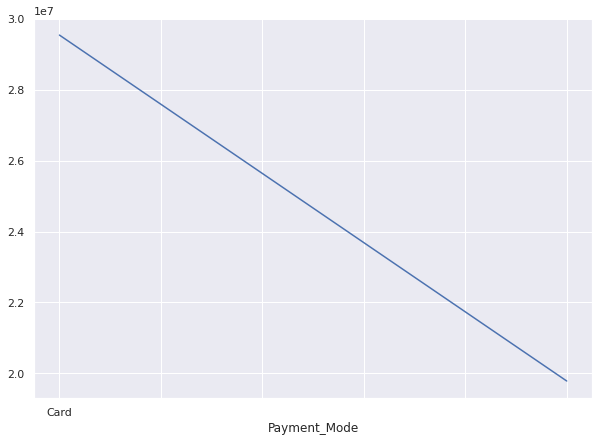

In [183]:
fig, ax = plt.subplots(figsize=(10,7))
data.groupby(['Payment_Mode'])['Profit'].sum().plot(ax=ax)

The card seems to be more profitable than using cash

In [ ]:
plt.plot(data['Payment_Mode'],data['Profit'])
plt.plot(data['Payment_Mode'],data['Profit'])
plt.show()

Both methods of cash payment seem to be equally profittable

### Customer Loyalty

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   City                359392 non-null  object        
 1   Population          359392 non-null  int64         
 2   Users               359392 non-null  int64         
 3   Transaction ID      359392 non-null  int64         
 4   Date of Travel      359392 non-null  datetime64[ns]
 5   Company             359392 non-null  object        
 6   KM Travelled        359392 non-null  float64       
 7   Price Charged       359392 non-null  float64       
 8   Cost of Trip        359392 non-null  float64       
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

Text(0.5, 1.0, 'Top 15 customers for Yellow Cab')

<Figure size 1440x720 with 0 Axes>

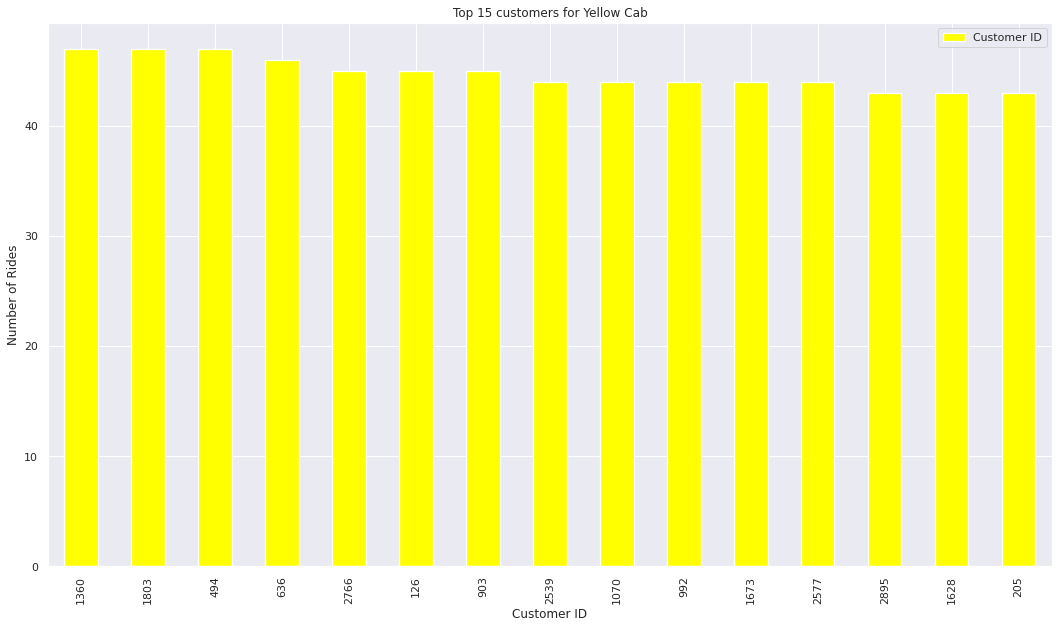

In [138]:
yellowChurn=yellowCab['Customer ID'].value_counts()[:15]
yellowChurn=pd.DataFrame(yellowChurn)

plt.figure(figsize=(20,10))

yellowChurn.plot.bar(color='yellow',linewidth=1.3,figsize=(18,10))
plt.xticks(rotation=90)
plt.ylabel('Number of Rides')
plt.xlabel("Customer ID")
plt.title("Top 15 customers for Yellow Cab")

Text(0.5, 1.0, 'Top 15 customers for Pink Cab')

<Figure size 1440x720 with 0 Axes>

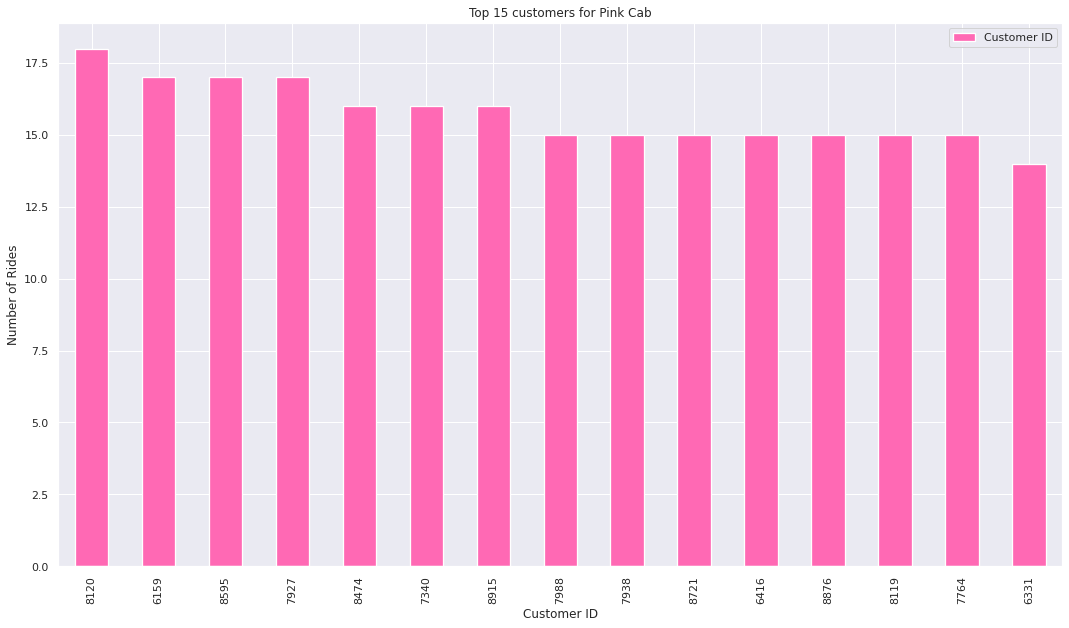

In [140]:
pinkChurn=pinkCab['Customer ID'].value_counts()[:15]
pinkChurn=pd.DataFrame(pinkChurn)

plt.figure(figsize=(20,10))

pinkChurn.plot.bar(color='hotpink',linewidth=1.3,figsize=(18,10))
plt.xticks(rotation=90)
plt.ylabel('Number of Rides')
plt.xlabel("Customer ID")
plt.title("Top 15 customers for Pink Cab")

The Yellow Company has loyal fan base with their most loyal user having done 40+ rides with the company

8120     18
6159     17
8595     17
7927     17
8474     16
         ..
58991     1
16594     1
22737     1
35019     1
22367     1
Name: Customer ID, Length: 32330, dtype: int64

# Hypothesis Testing

### **The higher the population the higher the number of user**

### Card Payments are used for trips that cost more

### The higher the cost of the trip the higher the profit

### Different cities are dominated by different cab company

### Profits are dependent on quarters

### Users travel more on weekdays than on weekends

### The older you are the higher you earn

### There has been a steady increase in cab usage (Demands for taxis)

# Recommendations

Using Different KPI'S 

### Which company is more profitable 

### If they are targetting a certain city

### Target higher income areas so as to get more revenue

### Customer Churn

### Targetting a particular quarter